---
# <center>Project Notebook</center>
---

<right>Author: Hardik B.</right>

# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

## NOTE: <a id='top'/> </a>
Running this entire notebook may take some time (in excess of 30 minutes)  

# Table of contents


1. [Problem statement](#ps)
2. [Solution Concept](#solution_concept)
3. [Machine learning theory](#ml_theroy)
4. [Data Exploration & Visualisation](#DE_VS)
    1. [Portfolio](#portfolio)
    2. [Profile](#profile)
    3. [Transcript](#transcript)
5. [Data Preprocessing & Advanced Visualisation](#data_processiong)
6. [Feature Engineering](#feature_engineering)
7. [Model training + Evaluation](#model)
8. [Conlucsion + Reflection + Future refinement](#conclusion)
 

# 1. Problem statement <a id='ps'></a>
[Top](#top)

This project is about the analysis of Starbucks customers who uses its mobile app. The aim is to analyze individual customer behaviors to identify unusual patterns. The finding of such an analysis should help Starbucks business to re-evaluate its rewards program based on specific findings. 

Ideally, the analysis should profile customers based on their spending behaviors and should connect it with their demographic attributes.

In this context, I frame the problem aiming to understand customer behavior through available data points and then providing specific business inputs based on results.

We should aim to provide:

- Is there any correlation between customer's spending habits and Starbucks reward programs?

- Can we identify high paying customers who don't care about the rewards program?

- Can we identify customers who haven't made any transactions in the past? Such customers might be pursued individually through a rewards program.
- Can we visualise customers interaction with offers and spending activities to gain some insight?

If possible, we should combine all the datasets, clean it, and preprocess it so that it applies to the target machine learning model.



# 2. Solution concept<a id='solution_concept'></a>
[Top](#top)

- There are three different datasets, which we should explore one by one and identify any issues like missing information, other inconsistencies, extra/redundant information. We should accomplish this by making good use of visualization as necessary. At the end of this step, we should have a clean dataset ready for further exploration.


- Based on the insights gained from data exploration activities, we should be able to identify the modeling concept that makes sense and similar business questions that we want to answer. 


- We should now combine all the three datasets into one single set and perform some further analysis through advanced visualization charts. Based on this, we should frame a classification problem that we can tackle through some machine learning algorithms.


- I have chosen a CatBoost algorithm, a multi-class classification algorithm, via supervised learning. It aims to identify the relations between highly co-related features automatically and comes with built-in visualizations. The  reason for selecting CatBoost over other classification algorithms is that it is straightforward to train and evaluate the model. The final results are usually better with default parameters because CatBoots uses horizontal decision trees internally. Since we are dealing with classification, model accuracy should be our standard evaluation criteria inclding confusion matrix.


- In the end, we evaluate the results of the overall analysis, including machine learning model evaluation.

# 3. Machine learning theory<a id='ml_theroy'></a>
[Top](#top)

Roughly speaking, machine learning problems can be divided into supervised, semi-supervised, unsupervised, and reinforcement learning.

Since we are going to build a supervised learning model to profile customers, let's recap some fundaments of supervised machine learning.
Supervised Learning

In supervised learning, the dataset is the collection of labeled examples. Each element in the set of examples is called a feature vector. Each attribute of such a feature can be described as the dimension of a feature vector.

For instance, in the profile dataset, we have customer id, age, gender, income attributes. Each of these attributes for a specific customer is a dimension of that customer's feature vector. Based on input features, the task is to deduce a label automatically.

For instance, the model created using the dataset of profile could take as input a feature vector describing a customer and output a probability that the customer responds to a given offer.

Classification is a problem of automatically assigning a label to an unlabeled example. 

In a classification problem, a label is a member of a finite set of classes. If the size of the set of classes is two (responds or doesn't respond to offer), it is called binary classification problem. Multiclass classification is a classification problem with three or more classes.

# 4. Data Exploration & Visulisation<a id='DE_VS'></a>
[Top](#top)

In [1]:
'''
We will be using bokeh library in addition to matplotlib and seaborn 
for visualisation of data throghout this notebook.
Below is the simple line chart using the bokeh for demostration purpose.

You can use the toolbox on the right side of chart to try out different functionalities 
like zoom-in, zoom-out, reset to analyse specific part of the chart/graph.

Bokeh documentatin can be found here: https://docs.bokeh.org/en/latest/index.html
'''

from bokeh.application import Application
from bokeh.application.handlers import FunctionHandler
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
from bokeh.layouts import row, gridplot
import scipy.special

output_notebook()

#default configuration to save bokeh chart upon creation
output_file('current_file.html', title='Bokeh Plot', mode='inline')

Loading BokehJS ...

In [2]:
#example bokeh line chart
x = [1, 2, 3, 4, 5]
y = [6, 7, 2, 4, 5]

plot = figure(title= "simple line", x_axis_label='x', y_axis_label = 'y')
plot.line(x, y, legend_label='Temp.', line_width =2)

show(plot)

In [188]:
import pandas as pd
import numpy as np
import json
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
import warnings
import os
import catboost
import joblib
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20.0, 10.0)
%matplotlib inline

from sklearn.preprocessing import robust_scale, scale
from matplotlib.figure import Figure

from catboost import CatBoostClassifier, Pool, cv
from catboost import MetricVisualizer
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


In [4]:
# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style(theme='oceans16')

# set "context" (paper, notebook, talk, poster)
# scale font-size of ticklabels, legend, etc.
# remove spines from x and y axes and make grid dashed
jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')

# turn on X- and Y-axis tick marks (default=False)
# turn off the axis grid lines (default=True)
# and set the default figure size
jtplot.style(ticks=True, grid=False, figsize=(6, 4.5))

# reset default matplotlib rcParams
#jtplot.reset()

In [7]:
path = '../data/raw/'

# read in the json files
profile = pd.read_json(os.path.join(path, 'profile.json'), orient='records', lines=True)

In [8]:
portfolio = pd.read_json(path + 'portfolio.json', orient='records', lines=True)

In [9]:
transcript = pd.read_json(os.path.join(path, 'transcript.json'), orient='records', lines=True)

# A : Portfolio <a id='portfolio'></a>
[Top](#top)

In [10]:
portfolio.shape

(10, 6)

In [11]:
portfolio.head()

reward                      channels  difficulty  duration     offer_type  \
0      10       [email, mobile, social]          10         7           bogo   
1      10  [web, email, mobile, social]          10         5           bogo   
2       0          [web, email, mobile]           0         4  informational   
3       5          [web, email, mobile]           5         7           bogo   
4       5                  [web, email]          20        10       discount   

                                 id  
0  ae264e3637204a6fb9bb56bc8210ddfd  
1  4d5c57ea9a6940dd891ad53e9dbe8da0  
2  3f207df678b143eea3cee63160fa8bed  
3  9b98b8c7a33c4b65b9aebfe6a799e6d9  
4  0b1e1539f2cc45b7b9fa7c272da2e1d7

In [12]:
portfolio.describe()

reward  difficulty   duration
count  10.000000   10.000000  10.000000
mean    4.200000    7.700000   6.500000
std     3.583915    5.831905   2.321398
min     0.000000    0.000000   3.000000
25%     2.000000    5.000000   5.000000
50%     4.000000    8.500000   7.000000
75%     5.000000   10.000000   7.000000
max    10.000000   20.000000  10.000000

In [13]:
portfolio['channels'].values.tolist()

[['email', 'mobile', 'social'],
 ['web', 'email', 'mobile', 'social'],
 ['web', 'email', 'mobile'],
 ['web', 'email', 'mobile'],
 ['web', 'email'],
 ['web', 'email', 'mobile', 'social'],
 ['web', 'email', 'mobile', 'social'],
 ['email', 'mobile', 'social'],
 ['web', 'email', 'mobile', 'social'],
 ['web', 'email', 'mobile']]

**Observation**
Looking at the 'channels' columns, it makes sense to disaggregate the each channel information into separate columns and encode using 0|1 identifiers.

Let's write a function for it.

In [14]:
def generic_one_hot_encoding(col, target_df):
    '''
    This function
    
    - Transforms a given 'col' having multiple attributes to separate columns with 0/1 encoding values
    
    Inputs:
     - col : input column 
       example : channels -> [web, email, mobile, social]
    
    Return Value:
    
     - 'target_df' with encoded columns names like [is_web, is_email, is_mobile, is_social]
    
    '''
    
    all_enconded_candidates = set()
    
    for enc_list in target_df[col].values.tolist():
        for cnd in enc_list:
            all_enconded_candidates.add(cnd)
    all_enconded_candidates = list(all_enconded_candidates)
    
    for cnd in all_enconded_candidates:
        target_df['is_' + cnd] = target_df[col].apply(
        lambda x: int(cnd in x))
    
    target_df = target_df.drop(col, axis =1)
    
    return target_df

In [15]:
portfolio = generic_one_hot_encoding('channels', portfolio)
portfolio.head(2)

reward  difficulty  duration offer_type                                id  \
0      10          10         7       bogo  ae264e3637204a6fb9bb56bc8210ddfd   
1      10          10         5       bogo  4d5c57ea9a6940dd891ad53e9dbe8da0   

   is_web  is_social  is_mobile  is_email  
0       0          1          1         1  
1       1          1          1         1

*Observation*

- Each indvidual offer is unique even though some of offers belongs to same offer_type. I assume offers belonging to same offer_type more similar to each other than offer belonging to differet offer_type. Hence we should only onsider offer_type as influencing factor in determining the customer behavior
- To validate the influence of offers within same offer_type group, a separate A/B test should be conducted.

Let's create dummies for offer_type column and encode it and drop the original column as we no longer required it

In [16]:
# We will create dummies for the column offer_type and remove the original column

portfolio = portfolio.join(pd.get_dummies(portfolio.offer_type))
portfolito =portfolio.drop(['offer_type'], axis =1 , inplace = True)

In [17]:
portfolio.head(5)

reward  difficulty  duration                                id  is_web  \
0      10          10         7  ae264e3637204a6fb9bb56bc8210ddfd       0   
1      10          10         5  4d5c57ea9a6940dd891ad53e9dbe8da0       1   
2       0           0         4  3f207df678b143eea3cee63160fa8bed       1   
3       5           5         7  9b98b8c7a33c4b65b9aebfe6a799e6d9       1   
4       5          20        10  0b1e1539f2cc45b7b9fa7c272da2e1d7       1   

   is_social  is_mobile  is_email  bogo  discount  informational  
0          1          1         1     1         0              0  
1          1          1         1     1         0              0  
2          0          1         1     0         0              1  
3          0          1         1     1         0              0  
4          0          0         1     0         1              0

Let's re-order the column name to make it more appropriate (i.e. id columns should be first)

In [18]:
portfolio = portfolio[
    ['id', 'difficulty', 'reward', 
     'duration','is_mobile', 'is_web', 
     'is_social', 'is_email','bogo',
     'discount','informational']
    ]

In [19]:
portfolio

id  difficulty  reward  duration  is_mobile  \
0  ae264e3637204a6fb9bb56bc8210ddfd          10      10         7          1   
1  4d5c57ea9a6940dd891ad53e9dbe8da0          10      10         5          1   
2  3f207df678b143eea3cee63160fa8bed           0       0         4          1   
3  9b98b8c7a33c4b65b9aebfe6a799e6d9           5       5         7          1   
4  0b1e1539f2cc45b7b9fa7c272da2e1d7          20       5        10          0   
5  2298d6c36e964ae4a3e7e9706d1fb8c2           7       3         7          1   
6  fafdcd668e3743c1bb461111dcafc2a4          10       2        10          1   
7  5a8bc65990b245e5a138643cd4eb9837           0       0         3          1   
8  f19421c1d4aa40978ebb69ca19b0e20d           5       5         5          1   
9  2906b810c7d4411798c6938adc9daaa5          10       2         7          1   

   is_web  is_social  is_email  bogo  discount  informational  
0       0          1         1     1         0              0  
1       1          1         1     1         0              0  
2       1          0         1     0         0              1  
3       1          0         1     1         0              0  
4       1          0         1     0         1              0  
5       1          1         1     0         1              0  
6       1          1         1     0         1              0  
7       0          1         1     0         0              1  
8       1          1         1     1         0              0  
9       1          0         1     0         1              0

*Observation*

- Here each offer is always sent via email channel. Therefore this feature is only informative and may not add any value to the predictive power of any machine learning algorithm.

Before we move on to Profile dataset, let's briefly consider potential data scaling issue in Portfolio dataframe.
We have 'difficulty', 'reward', 'duration' on different numberic scale and unit.

We should try to rescale it with mean value around 0 if that is expected by chosen machine learning algorithm.

Text(0.5, 0, 'Scaled value')

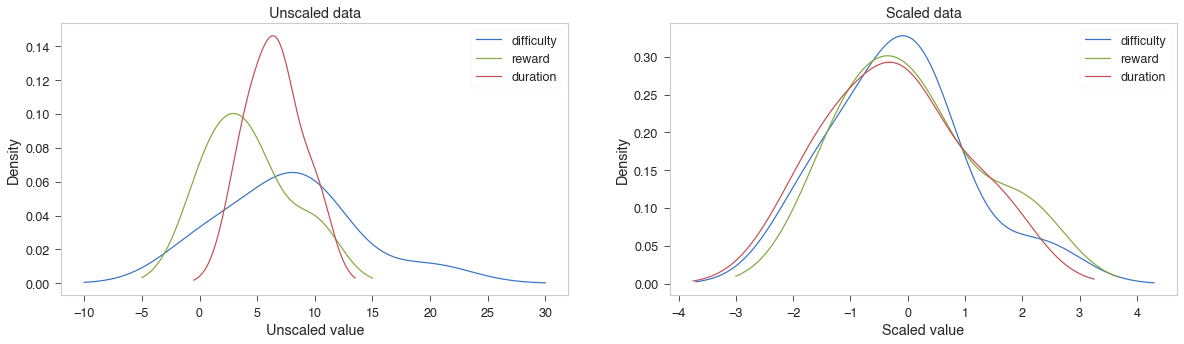

In [20]:
figure, axis = plt.subplots(figsize=(20, 5), nrows=1, ncols=2)
numeric_columns = ['difficulty','reward','duration']

numeric_df = portfolio[numeric_columns]

numeric_df.plot.density(ax=axis[0])
axis[0].set_title('Unscaled data')
axis[0].set_xlabel('Unscaled value')

scaled_df = robust_scale(numeric_df)
scaled_df = pd.DataFrame(scaled_df, columns=numeric_df.columns, index=numeric_df.index)

scaled_df.plot.density(ax=axis[1])
axis[1].set_title('Scaled data')
axis[1].set_xlabel('Scaled value')

# B : Profile  <a id='profile'></a>
[Top](#top)

In [21]:
profile

gender  age                                id  became_member_on  \
0       None  118  68be06ca386d4c31939f3a4f0e3dd783          20170212   
1          F   55  0610b486422d4921ae7d2bf64640c50b          20170715   
2       None  118  38fe809add3b4fcf9315a9694bb96ff5          20180712   
3          F   75  78afa995795e4d85b5d9ceeca43f5fef          20170509   
4       None  118  a03223e636434f42ac4c3df47e8bac43          20170804   
...      ...  ...                               ...               ...   
16995      F   45  6d5f3a774f3d4714ab0c092238f3a1d7          20180604   
16996      M   61  2cb4f97358b841b9a9773a7aa05a9d77          20180713   
16997      M   49  01d26f638c274aa0b965d24cefe3183f          20170126   
16998      F   83  9dc1421481194dcd9400aec7c9ae6366          20160307   
16999      F   62  e4052622e5ba45a8b96b59aba68cf068          20170722   

         income  
0           NaN  
1      112000.0  
2           NaN  
3      100000.0  
4           NaN  
...         ...  
16995   54000.0  
16996   72000.0  
16997   73000.0  
16998   50000.0  
16999   82000.0  

[17000 rows x 5 columns]

In [22]:
profile.describe()

age  became_member_on         income
count  17000.000000      1.700000e+04   14825.000000
mean      62.531412      2.016703e+07   65404.991568
std       26.738580      1.167750e+04   21598.299410
min       18.000000      2.013073e+07   30000.000000
25%       45.000000      2.016053e+07   49000.000000
50%       58.000000      2.017080e+07   64000.000000
75%       73.000000      2.017123e+07   80000.000000
max      118.000000      2.018073e+07  120000.000000

In [23]:
set(profile.gender.values.tolist())

{'F', 'M', None, 'O'}

In [24]:
profile[profile['age'] == 118]

gender  age                                id  became_member_on  income
0       None  118  68be06ca386d4c31939f3a4f0e3dd783          20170212     NaN
2       None  118  38fe809add3b4fcf9315a9694bb96ff5          20180712     NaN
4       None  118  a03223e636434f42ac4c3df47e8bac43          20170804     NaN
6       None  118  8ec6ce2a7e7949b1bf142def7d0e0586          20170925     NaN
7       None  118  68617ca6246f4fbc85e91a2a49552598          20171002     NaN
...      ...  ...                               ...               ...     ...
16980   None  118  5c686d09ca4d475a8f750f2ba07e0440          20160901     NaN
16982   None  118  d9ca82f550ac4ee58b6299cf1e5c824a          20160415     NaN
16989   None  118  ca45ee1883624304bac1e4c8a114f045          20180305     NaN
16991   None  118  a9a20fa8b5504360beb4e7c8712f8306          20160116     NaN
16994   None  118  c02b10e8752c4d8e9b73f918558531f7          20151211     NaN

[2175 rows x 5 columns]

**Observation** 
It is obvious that age value 118 is placeholder for misisng value.
The above analysis suggests that 2175 entries are missing for gender, age and income columns togather

We should consider removing all rows if we consider any demographic data in order to find insights
Currently, let's keep it as-is

In [26]:
profile['gender'].value_counts()

M    8484
F    6129
O     212
Name: gender, dtype: int64

In [27]:
profile.isnull().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [28]:
profile.became_member_on

0        20170212
1        20170715
2        20180712
3        20170509
4        20170804
           ...   
16995    20180604
16996    20180713
16997    20170126
16998    20160307
16999    20170722
Name: became_member_on, Length: 17000, dtype: int64

**Observation** becaome_member_on is time stamped date, let's transform it into more readable format and later extract the number of days since the customer has signed up. This may prove useful later.

In [29]:
profile.became_member_on = pd.to_datetime(profile.became_member_on, format='%Y%m%d', errors='coerce')

profile.head()

gender  age                                id became_member_on    income
0   None  118  68be06ca386d4c31939f3a4f0e3dd783       2017-02-12       NaN
1      F   55  0610b486422d4921ae7d2bf64640c50b       2017-07-15  112000.0
2   None  118  38fe809add3b4fcf9315a9694bb96ff5       2018-07-12       NaN
3      F   75  78afa995795e4d85b5d9ceeca43f5fef       2017-05-09  100000.0
4   None  118  a03223e636434f42ac4c3df47e8bac43       2017-08-04       NaN

In [30]:
profile.became_member_on.min()

Timestamp('2013-07-29 00:00:00')

In [31]:
profile['member_since_x_days'] = (
pd.to_datetime('today') - profile.became_member_on)
profile['member_since_x_days'] = profile['member_since_x_days'].dt.days

In [32]:
profile.head(2)

gender  age                                id became_member_on    income  \
0   None  118  68be06ca386d4c31939f3a4f0e3dd783       2017-02-12       NaN   
1      F   55  0610b486422d4921ae7d2bf64640c50b       2017-07-15  112000.0   

   member_since_x_days  
0                 1166  
1                 1013

**Let's create some visualisations to analyze the demographic data**

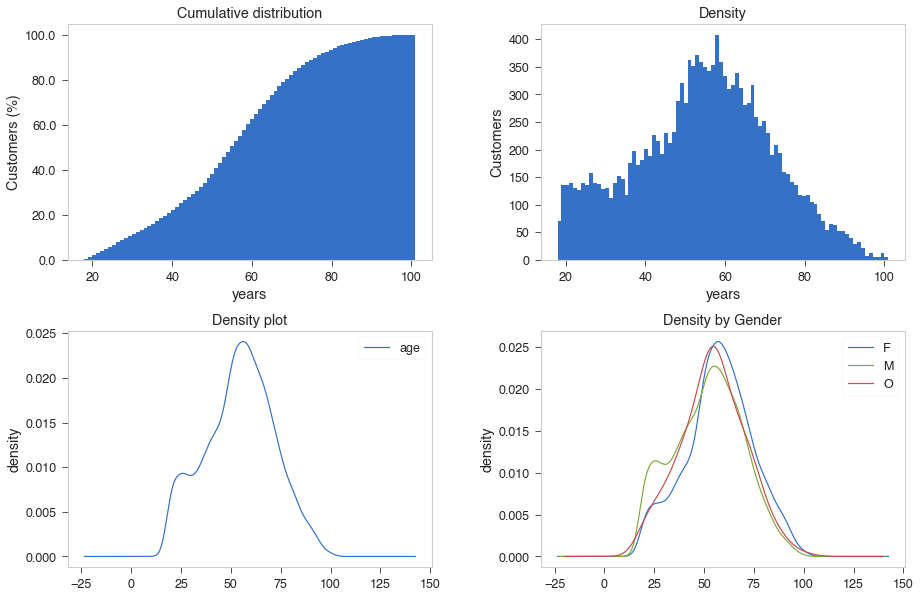

In [34]:
age_df = pd.DataFrame(profile.age[~(profile.age == 118)])

description_pdstyle = \
    pd.DataFrame(age_df.describe()).style \
    .set_caption('Ages description') \
    .set_table_attributes('style="display:inline;' \
                          'vertical-align:top"')


fig1 = Figure(figsize=(10,4))
axs = fig1.subplots(nrows=1, ncols=2)
axs = axs.flatten()
axs[0].set_title('Box Plot')
age_df.plot.box(ax=axs[0])
axs[1].violinplot(age_df.values)
axs[1].set_title('Violin Plot')


bins = 84
fig2, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axs = axs.flatten()

age_df.hist(bins=bins, ax=axs[0], cumulative=True, density=True)
axs[0].set_title('Cumulative distribution')
axs[0].set_ylabel('Customers (%)')
axs[0].set_yticklabels((axs[0].get_yticks()*100).round(0))
axs[0].set_xscale('linear')
axs[0].set_xlabel('years')
axs[0].grid(False)


age_df.hist(bins=bins, ax=axs[1])
axs[1].set_title('Density')
axs[1].set_ylabel('Customers')
axs[1].set_xscale('linear')
axs[1].set_xlabel('years')
axs[1].grid(False)


age_df.plot.density(ax=axs[2])
axs[2].legend()
axs[2].set_title('Density plot')
axs[2].set_ylabel('density')
axs[2].grid(False)

age_gender_df = profile[~(profile.age == 118)].groupby('gender').age
age_gender_df.plot.density(ax=axs[3])
axs[3].set_title('Density by Gender')
axs[3].set_ylabel('density')
axs[3].legend()
axs[3].grid(False)
                       
plt.show()

*Observation*

- For each gender, the age distribution is roughly similar and picks at around age of 60. This means that most customer are middle aged with some younger male customer at around age 25.

In [38]:
from bokeh.plotting import figure, output_file, show
def make_distribution_plot(title, hist, edges, x):
    '''
    This function 
        plots a density distribution of customer age
    '''
    
    p = figure(title=title, tools='', background_fill_color="#fafafa")
    p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
           fill_color="navy", line_color="white", alpha=0.5)

    p.y_range.start = 0
    p.y_range.end = 0.03
    p.legend.location = "center_right"
    p.legend.background_fill_color = "#fefefe"
    p.xaxis.axis_label = 'x'
    p.yaxis.axis_label = 'Pr(x)'
    p.grid.grid_line_color="white"
    
    return p

measured = np.asarray(age_df.age.tolist(), dtype=np.float32)
hist, edges = np.histogram(measured, density=True, bins=84)
x = measured

output_file('age_distribution.html')
p1 = make_distribution_plot("Age Distribution", hist, edges, x)
show(p1)

**Let's create a histogram showing income range against number of customers**

Text(0.5, 0, 'Income in $')

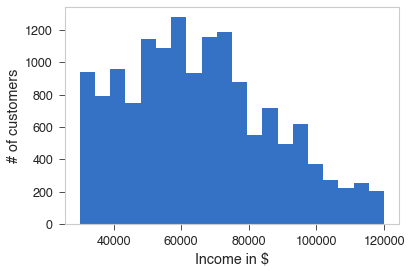

In [39]:
axs = profile.income.hist(bins = 20)
axs.grid(False)
axs.set_ylabel('# of customers')
axs.set_xlabel('Income in $')

*Observation*

- Surprisingly, there are many customers who falls into relatively lower income group and very few customers who falls into relatively high income groups. This could be due to the fact that younger customers may be earning less and younger customers are in general more technology oriented compared with older folks.

**Next, let's create a chart showing customer sign up year**

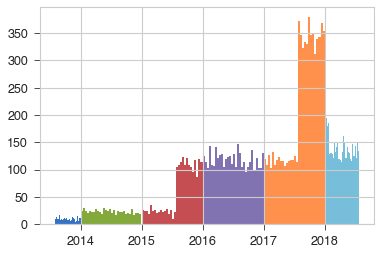

In [40]:
axs = profile.became_member_on.groupby(profile.became_member_on.dt.year).hist(bins=30)

*Observation*
 - The above chart shows that there is a steady increse in the number of customer who started using starbucks app. However, there is steep fall at the end of 2017. This could also be due to sampling bias (more customers have been sampled from mid 2017 duration) to prepare the dataset

**Let's draw some pair-wise plot of demographics data. We should drop the NA values**

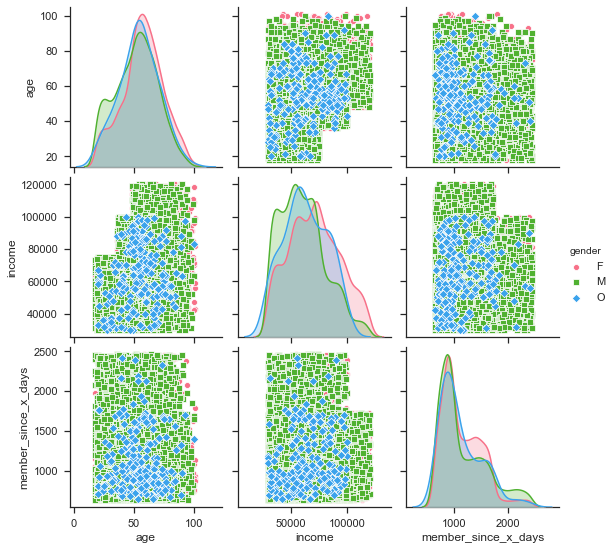

In [42]:
def draw_pair_plot(df):
    
    sns.set(style= "ticks", color_codes=True)
    normal_pair_plot = sns.pairplot(df[['age', 
                      'income', 
                      'gender', 
                      'member_since_x_days']].dropna(), 
             hue='gender', 
             palette="husl", 
             markers=["o", "s", "D"])
    normal_pair_plot
    
draw_pair_plot(profile)

**Observation: It seems that there are not many female customers and the female group is relatively older and has higher income**

Next, Let's visualise a pair plot using linear regression fit 

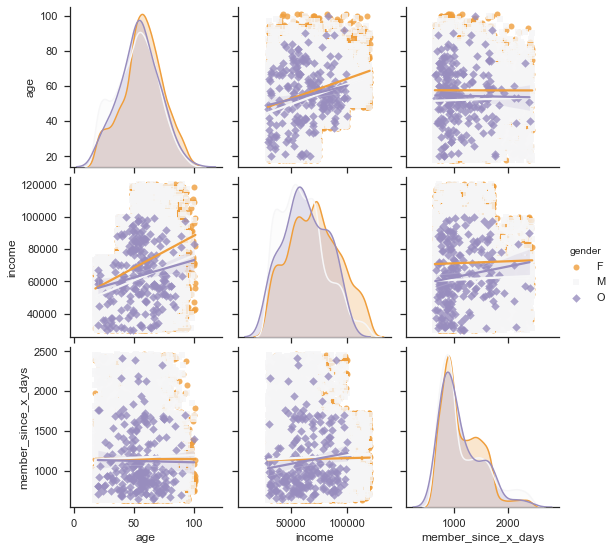

In [43]:
#Fit linear regression models to the scatter plots:
sns.set(style= "ticks", color_codes=True)
reg_pair_plot = sns.pairplot(profile[['age', 
                      'income', 
                      'gender', 
                      'member_since_x_days']].dropna(), 
             hue='gender', 
             palette="PuOr", 
             markers=["o", "s", "D"], kind= "reg")
reg_pair_plot

*Observation*

The above set of chart leads to some interesting observations

- There exist no customer in the age group [20, 30] having income greater thean 80K.
- Similarly there exists not customer in the age group [40, 50] having income greater than 100K.
- All the customer who became member more than 2000 days ago has income less than 100K.

# C : Transcript  <a id='transcript'></a>
[Top](#top)

In [44]:
transcript

person           event  \
0       78afa995795e4d85b5d9ceeca43f5fef  offer received   
1       a03223e636434f42ac4c3df47e8bac43  offer received   
2       e2127556f4f64592b11af22de27a7932  offer received   
3       8ec6ce2a7e7949b1bf142def7d0e0586  offer received   
4       68617ca6246f4fbc85e91a2a49552598  offer received   
...                                  ...             ...   
306529  b3a1272bc9904337b331bf348c3e8c17     transaction   
306530  68213b08d99a4ae1b0dcb72aebd9aa35     transaction   
306531  a00058cf10334a308c68e7631c529907     transaction   
306532  76ddbd6576844afe811f1a3c0fbb5bec     transaction   
306533  c02b10e8752c4d8e9b73f918558531f7     transaction   

                                                   value  time  
0       {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}     0  
1       {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}     0  
2       {'offer id': '2906b810c7d4411798c6938adc9daaa5'}     0  
3       {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}     0  
4       {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}     0  
...                                                  ...   ...  
306529                    {'amount': 1.5899999999999999}   714  
306530                                  {'amount': 9.53}   714  
306531                                  {'amount': 3.61}   714  
306532                    {'amount': 3.5300000000000002}   714  
306533                                  {'amount': 4.05}   714  

[306534 rows x 4 columns]

In [45]:
transcript.describe()

time
count  306534.000000
mean      366.382940
std       200.326314
min         0.000000
25%       186.000000
50%       408.000000
75%       528.000000
max       714.000000

*Observation*

The initial looks at transcript dataset suggests that value column is encoded as dictionary.
If event is related to offers, then values column encode offer id and in case of transaction event, it encode the amount of transcation.

Therefore, it makes sense to decode the value column into separate columns to better understand the relatationship between event status and corresponding effect on amount spent by the customers.

In [46]:
#Let's transform value column into separate columns

def transform_value_column(transaction):
    '''transform/unpivot the value column and return new transcript dataframe'''
    
    values = pd.DataFrame(transaction.value.tolist())
    values.offer_id.update(values['offer id'])
    values = values.drop('offer id', axis=1)
    
    return transaction.join(values).drop('value', axis=1)

In [48]:
transcript = transform_value_column(transcript)

In [49]:
transcript.head(2)

person           event  time  amount  \
0  78afa995795e4d85b5d9ceeca43f5fef  offer received     0     NaN   
1  a03223e636434f42ac4c3df47e8bac43  offer received     0     NaN   

                           offer_id  reward  
0  9b98b8c7a33c4b65b9aebfe6a799e6d9     NaN  
1  0b1e1539f2cc45b7b9fa7c272da2e1d7     NaN

In [50]:
transcript.event.value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

Let's create a pie chart to visulise how many offer were completed and viewed relative to offers received

In [51]:
#https://docs.bokeh.org/en/latest/docs/gallery/pie_chart.html?highlight=pie%20chart (derived from here)

def draw_pie_chart(data_dict, output_file_name):
    
    '''
    This function
     - draws a pie chart out of given data_dict 
     - output a html file with given 'output_file_name'
    '''
    
    from math import pi
    import pandas as pd
    from bokeh.io import output_file, show
    from bokeh.palettes import Category20c
    from bokeh.plotting import figure
    from bokeh.transform import cumsum

    output_file(output_file_name + ".html")
    x = data_dict
    data = pd.Series(x).reset_index(name='value').rename(columns={'index':'event'})
    data['angle'] = data['value']/data['value'].sum() * 2*pi
    data['color'] = Category20c[len(x)]

    p = figure(plot_height=350, title="Pie Chart", toolbar_location=None,
           tools="hover", tooltips="@event: @value", x_range=(-0.5, 1.0))

    p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend_field='event', source=data)

    p.axis.axis_label=None
    p.axis.visible=False
    p.grid.grid_line_color = None

    show(p)

In [52]:
data_dict_1 = {
    'Transction': 138953,
    'Offer received': 76277,
    'Offer viewed': 57725,
    'Offer completed': 33579
}

draw_pie_chart(data_dict_1, 'offer_distribution_1')

data_dict_2 = {
    'Offer received': 76277,
    'Offer viewed': 57725,
    'Offer completed': 33579
}

draw_pie_chart(data_dict_2, 'offer_distribution_2')

**Let's do a quick analysis to check if there exist extra customers not found in the profile data set**

In [53]:
t_p_set =set(transcript['person'].values.tolist())

len(t_p_set)

17000

In [54]:
p_set = set(profile['id'].values.tolist())

len(p_set)

17000

In [55]:
print(t_p_set - p_set)

set()


*Observation* <br>
The above analysis suggests that all the persons in transaction is found in the profile 
i.e. for each transaction, there is person with known demographics

In [56]:
transcript.isna().sum()

person           0
event            0
time             0
amount      167581
offer_id    138953
reward      272955
dtype: int64

*Observation*

First of all, we should find out the total count of the completed offers after being viewed for each customer.
The current data includes 'offers completed' by customers, knowingly or unknowingly.  The customers who have unknowingly completed offers should not be sent out further offers. This target group represents profitable customers for the company.

In order to answer the above question,

Let's find out customers who have received the offers but have not viewed it. We combine our transcript dataset with the customer demographics (profiles) first and then identify those customers.

It could also be the case a single customer may have received multiple offers, but he may not view all of them but may have completed them unknowingly.

# 5: Data Preprocessing & Advanced Visualisation <a id='data_processiong'></a>
[Top](#top)

In [58]:
def join_data(transcript, profile, portfolio):
    '''
    This function
    - joins a given dataframes in a single dataframe based on common columns
    '''
    
    df = transcript.merge(profile, left_on='person', right_on='id',
                                 how='left').drop('id', axis=1)
    
    df = df.merge(portfolio,
        left_on='offer_id', right_on='id', how='left').drop('id', axis=1)
    
    return df

In [59]:
merged_df = join_data(transcript, profile, portfolio)

In [60]:
merged_df.head(5)

person           event  time  amount  \
0  78afa995795e4d85b5d9ceeca43f5fef  offer received     0     NaN   
1  a03223e636434f42ac4c3df47e8bac43  offer received     0     NaN   
2  e2127556f4f64592b11af22de27a7932  offer received     0     NaN   
3  8ec6ce2a7e7949b1bf142def7d0e0586  offer received     0     NaN   
4  68617ca6246f4fbc85e91a2a49552598  offer received     0     NaN   

                           offer_id  reward_x gender  age became_member_on  \
0  9b98b8c7a33c4b65b9aebfe6a799e6d9       NaN      F   75       2017-05-09   
1  0b1e1539f2cc45b7b9fa7c272da2e1d7       NaN   None  118       2017-08-04   
2  2906b810c7d4411798c6938adc9daaa5       NaN      M   68       2018-04-26   
3  fafdcd668e3743c1bb461111dcafc2a4       NaN   None  118       2017-09-25   
4  4d5c57ea9a6940dd891ad53e9dbe8da0       NaN   None  118       2017-10-02   

     income  ...  difficulty  reward_y  duration  is_mobile  is_web  \
0  100000.0  ...         5.0       5.0       7.0        1.0     1.0   
1       NaN  ...        20.0       5.0      10.0        0.0     1.0   
2   70000.0  ...        10.0       2.0       7.0        1.0     1.0   
3       NaN  ...        10.0       2.0      10.0        1.0     1.0   
4       NaN  ...        10.0      10.0       5.0        1.0     1.0   

   is_social  is_email  bogo  discount  informational  
0        0.0       1.0   1.0       0.0            0.0  
1        0.0       1.0   0.0       1.0            0.0  
2        0.0       1.0   0.0       1.0            0.0  
3        1.0       1.0   0.0       1.0            0.0  
4        1.0       1.0   1.0       0.0            0.0  

[5 rows x 21 columns]

In [61]:
#Let's look at the column names
merged_df.columns

Index(['person', 'event', 'time', 'amount', 'offer_id', 'reward_x', 'gender',
       'age', 'became_member_on', 'income', 'member_since_x_days',
       'difficulty', 'reward_y', 'duration', 'is_mobile', 'is_web',
       'is_social', 'is_email', 'bogo', 'discount', 'informational'],
      dtype='object')

In [62]:
#Let's rename rewards columns to signify that _x -> _t (transcript) and _x -> _p (portfoli)
merged_df = merged_df.rename(columns={'reward_x' : 'rewards_t' , 'reward_y' : 'rewards_p'})

Now we have joined dataset which we should explore further.

As first step, let's query a datset to find all the associated events for two particular customers and display it

In [63]:
display(pd.DataFrame().append([
    merged_df.query('event=="offer received"').head(),
    merged_df.query('event=="offer viewed"').head(),
    merged_df.query('event=="transaction"').head(),
    merged_df.query('event=="offer completed"').head(),
    merged_df.query('person=="78afa995795e4d85b5d9ceeca43f5fef"').head(),
    merged_df.query('person=="02c083884c7d45b39cc68e1314fec56c"').head()]))

person            event  time  amount  \
0      78afa995795e4d85b5d9ceeca43f5fef   offer received     0     NaN   
1      a03223e636434f42ac4c3df47e8bac43   offer received     0     NaN   
2      e2127556f4f64592b11af22de27a7932   offer received     0     NaN   
3      8ec6ce2a7e7949b1bf142def7d0e0586   offer received     0     NaN   
4      68617ca6246f4fbc85e91a2a49552598   offer received     0     NaN   
12650  389bc3fa690240e798340f5a15918d5c     offer viewed     0     NaN   
12651  d1ede868e29245ea91818a903fec04c6     offer viewed     0     NaN   
12652  102e9454054946fda62242d2e176fdce     offer viewed     0     NaN   
12653  02c083884c7d45b39cc68e1314fec56c     offer viewed     0     NaN   
12655  be8a5d1981a2458d90b255ddc7e0d174     offer viewed     0     NaN   
12654  02c083884c7d45b39cc68e1314fec56c      transaction     0    0.83   
12657  9fa9ae8f57894cc9a3b8a9bbe0fc1b2f      transaction     0   34.56   
12659  54890f68699049c2a04d415abc25e717      transaction     0   13.23   
12670  b2f1cd155b864803ad8334cdf13c4bd2      transaction     0   19.51   
12671  fe97aa22dd3e48c8b143116a8403dd52      transaction     0   18.97   
12658  9fa9ae8f57894cc9a3b8a9bbe0fc1b2f  offer completed     0     NaN   
12672  fe97aa22dd3e48c8b143116a8403dd52  offer completed     0     NaN   
12679  629fc02d56414d91bca360decdfa9288  offer completed     0     NaN   
12692  676506bad68e4161b9bbaffeb039626b  offer completed     0     NaN   
12697  8f7dd3b2afe14c078eb4f6e6fe4ba97d  offer completed     0     NaN   
0      78afa995795e4d85b5d9ceeca43f5fef   offer received     0     NaN   
15561  78afa995795e4d85b5d9ceeca43f5fef     offer viewed     6     NaN   
47582  78afa995795e4d85b5d9ceeca43f5fef      transaction   132   19.89   
47583  78afa995795e4d85b5d9ceeca43f5fef  offer completed   132     NaN   
49502  78afa995795e4d85b5d9ceeca43f5fef      transaction   144   17.78   
27     02c083884c7d45b39cc68e1314fec56c   offer received     0     NaN   
12653  02c083884c7d45b39cc68e1314fec56c     offer viewed     0     NaN   
12654  02c083884c7d45b39cc68e1314fec56c      transaction     0    0.83   
15565  02c083884c7d45b39cc68e1314fec56c      transaction     6    1.44   
18071  02c083884c7d45b39cc68e1314fec56c      transaction    12    4.56   

                               offer_id  rewards_t gender  age  \
0      9b98b8c7a33c4b65b9aebfe6a799e6d9        NaN      F   75   
1      0b1e1539f2cc45b7b9fa7c272da2e1d7        NaN   None  118   
2      2906b810c7d4411798c6938adc9daaa5        NaN      M   68   
3      fafdcd668e3743c1bb461111dcafc2a4        NaN   None  118   
4      4d5c57ea9a6940dd891ad53e9dbe8da0        NaN   None  118   
12650  f19421c1d4aa40978ebb69ca19b0e20d        NaN      M   65   
12651  5a8bc65990b245e5a138643cd4eb9837        NaN      O   53   
12652  4d5c57ea9a6940dd891ad53e9dbe8da0        NaN      F   69   
12653  ae264e3637204a6fb9bb56bc8210ddfd        NaN      F   20   
12655  5a8bc65990b245e5a138643cd4eb9837        NaN      M   39   
12654                               NaN        NaN      F   20   
12657                               NaN        NaN      M   42   
12659                               NaN        NaN      M   36   
12670                               NaN        NaN      F   55   
12671                               NaN        NaN      F   39   
12658  2906b810c7d4411798c6938adc9daaa5        2.0      M   42   
12672  fafdcd668e3743c1bb461111dcafc2a4        2.0      F   39   
12679  9b98b8c7a33c4b65b9aebfe6a799e6d9        5.0      M   52   
12692  ae264e3637204a6fb9bb56bc8210ddfd       10.0      M   37   
12697  4d5c57ea9a6940dd891ad53e9dbe8da0       10.0      M   48   
0      9b98b8c7a33c4b65b9aebfe6a799e6d9        NaN      F   75   
15561  9b98b8c7a33c4b65b9aebfe6a799e6d9        NaN      F   75   
47582                               NaN        NaN      F   75   
47583  9b98b8c7a33c4b65b9aebfe6a799e6d9        5.0      F   75   
49502                               NaN        NaN      F   75   
27     ae264e3637204a6

**Observation**

- As soon as an offer completes, an entry into 'rewards_t'  equal to the 'rewards_p' happens.

- Timestamp started at 0 when the first offer received event occurred.

- When a customer makes a transaction which is higher than the offered reward within the offer duration (duration column, expressed in days), offer completes immediately (see records 47582, 47583), and reward gets credited to the customer.

- The customer may receive two different offers at the same time and may complete two offers at the same time given a transaction exceeding the rewards is made.

Let's examine events separately

In [64]:
offer_received_events = pd.DataFrame().append([
    merged_df[['person', 'event', 'time', 'offer_id', 'amount', 'duration','rewards_t', 'rewards_p']]
    .query('event=="offer received"')])

offer_received_events.head(5)

person           event  time  \
0  78afa995795e4d85b5d9ceeca43f5fef  offer received     0   
1  a03223e636434f42ac4c3df47e8bac43  offer received     0   
2  e2127556f4f64592b11af22de27a7932  offer received     0   
3  8ec6ce2a7e7949b1bf142def7d0e0586  offer received     0   
4  68617ca6246f4fbc85e91a2a49552598  offer received     0   

                           offer_id  amount  duration  rewards_t  rewards_p  
0  9b98b8c7a33c4b65b9aebfe6a799e6d9     NaN       7.0        NaN        5.0  
1  0b1e1539f2cc45b7b9fa7c272da2e1d7     NaN      10.0        NaN        5.0  
2  2906b810c7d4411798c6938adc9daaa5     NaN       7.0        NaN        2.0  
3  fafdcd668e3743c1bb461111dcafc2a4     NaN      10.0        NaN        2.0  
4  4d5c57ea9a6940dd891ad53e9dbe8da0     NaN       5.0        NaN       10.0

In [65]:
offer_received_events.time.max()/24

24.0

In [66]:
offer_received_events.time.describe()

count    76277.000000
mean       332.579519
std        196.489548
min          0.000000
25%        168.000000
50%        408.000000
75%        504.000000
max        576.000000
Name: time, dtype: float64

In [67]:
offer_received_events.time.value_counts().sort_values(ascending=True)

0      12650
168    12669
504    12704
336    12711
576    12765
408    12778
Name: time, dtype: int64

In [68]:
s_sent = offer_received_events.time.value_counts().sort_index(ascending=True)

In [69]:
#Let's find out on which days offers are sent by dividing timeline by 24.

offer_sent_time_in_hours = offer_received_events.time.value_counts().sort_index(ascending=True).index.tolist()

offer_sent_time_in_days = []

for x in offer_sent_time_in_hours:
    if x != 0:
        x = x/24
        offer_sent_time_in_days.append(x)
        
offer_sent_time_in_days.append(0.0)

print(offer_sent_time_in_hours)

offer_sent_time_in_days.sort()
print(offer_sent_time_in_days)

[0, 168, 336, 408, 504, 576]
[0.0, 7.0, 14.0, 17.0, 21.0, 24.0]


In [70]:
offer_received_events.time.value_counts().sort_values(ascending=True).describe()

count        6.000000
mean     12712.833333
std         50.830765
min      12650.000000
25%      12677.750000
50%      12707.500000
75%      12751.500000
max      12778.000000
Name: time, dtype: float64

*Observation*

- We can see that the timeline range is [0, 576] for the offer received event. Every offer gets received in 24 days period (or the data is sampled only for 24 days).

- Ther are only 6 distinct time values present, and if we divide those values by 24, we get on which day the offer has been sent.

- If we find statistics of those 6 days, we can see that on each of these days, around 12712 offers get received.

- Assuming the offer gets received in equal proportions on each instance, the dataset is balanced with respect to the number of offers sent out at each time interval.



Let's explore offers viewed events

In [72]:
offer_viewed_events = pd.DataFrame().append([
    merged_df[['person', 'event', 'time', 'offer_id', 'amount', 'duration','rewards_t', 'rewards_p']]
    .query('event=="offer viewed"')])

In [73]:
offer_viewed_events.head(5)

person         event  time  \
12650  389bc3fa690240e798340f5a15918d5c  offer viewed     0   
12651  d1ede868e29245ea91818a903fec04c6  offer viewed     0   
12652  102e9454054946fda62242d2e176fdce  offer viewed     0   
12653  02c083884c7d45b39cc68e1314fec56c  offer viewed     0   
12655  be8a5d1981a2458d90b255ddc7e0d174  offer viewed     0   

                               offer_id  amount  duration  rewards_t  \
12650  f19421c1d4aa40978ebb69ca19b0e20d     NaN       5.0        NaN   
12651  5a8bc65990b245e5a138643cd4eb9837     NaN       3.0        NaN   
12652  4d5c57ea9a6940dd891ad53e9dbe8da0     NaN       5.0        NaN   
12653  ae264e3637204a6fb9bb56bc8210ddfd     NaN       7.0        NaN   
12655  5a8bc65990b245e5a138643cd4eb9837     NaN       3.0        NaN   

       rewards_p  
12650        5.0  
12651        0.0  
12652       10.0  
12653       10.0  
12655        0.0

In [74]:
offer_viewed_events.time.describe()

count    57725.000000
mean       354.290515
std        199.317684
min          0.000000
25%        180.000000
50%        408.000000
75%        516.000000
max        714.000000
Name: time, dtype: float64

In [75]:
max_duration_in_days = offer_viewed_events.duration.value_counts().index.max()
max_duration_in_hours = max_duration_in_days * 24
max_allowed_view_duration = max_duration_in_hours + 576 # 576 is the last timestamp on which offers were sent out

In [76]:
max_allowed_view_duration

816.0

In [77]:
if offer_viewed_events.time.max() <= max_allowed_view_duration:
    print('All viewed offers event has time stamp value less than or equal to max allowed duration to view offers')
else:
    print('Time stamp for viewed offers event is not marked properly')

All viewed offers event has time stamp value less than or equal to max allowed duration to view offers


In [78]:
offer_viewed_events.time.value_counts()

408    2210
504    2153
576    2152
168    2120
336    2103
       ... 
318      42
156      39
324      35
330      28
162      25
Name: time, Length: 120, dtype: int64

The above series suggest that there are some higher number of offers being viewed at particular time.
Let's plot a chart of number of offers viewed against a timeline

In [79]:
offer_viewed_time = offer_viewed_events.time.value_counts().sort_index()
offer_sent = offer_received_events.time.value_counts().sort_index()

#we will shrink the count of offers sent by 75% to make the chart looks nice.See legent for counting actual values
offer_sent_shrinked = offer_sent/4

In [80]:
p1 = None

output_file('offers_viewed_timeline.html')

p1 = figure(title="# of offer viewed over time (in hours)", 
            x_axis_label='timestamp in hours', 
            y_axis_label = '# of events',
            plot_width=900, tools= "pan,wheel_zoom,box_zoom,reset,hover"
            )
yticks = np.array([0, 50, 100, 200, 500, 1000, 2000, 3000, 3500])
p1.yaxis.ticker = yticks


p1.line(offer_viewed_time.index, offer_viewed_time, line_width =2)
p1.circle(offer_viewed_time.index, offer_viewed_time, fill_color = "white",color = "navy", size=8 , legend_label='offer_viewed')
p1.cross(offer_sent_shrinked.index, offer_sent_shrinked, size=12,
           color="#E6550D", line_width=2, legend_label='* 4 = offers_sent')

show(p1)

*Observation*

- The above chart displays the number of offers viewed against timestamp in hours. There are six peaks where the number of viewed offers increases dramatically. 

- I have embedded the number of offers received (correct received offer count is 4 times the marked one) in the chart. When new offers get received, the count of viewed offer increases and then slowly decreases over time. 

- Generally speaking, most offers are viewed within 24 hours of receipt.

Let's analyze offers completed events

In [81]:
offer_completed_events = pd.DataFrame().append([
    merged_df[['person', 'event', 'time', 'offer_id', 'amount', 'duration','rewards_t', 'rewards_p']]
    .query('event=="offer completed"')])

In [82]:
offer_completed_events.head(2)

person            event  time  \
12658  9fa9ae8f57894cc9a3b8a9bbe0fc1b2f  offer completed     0   
12672  fe97aa22dd3e48c8b143116a8403dd52  offer completed     0   

                               offer_id  amount  duration  rewards_t  \
12658  2906b810c7d4411798c6938adc9daaa5     NaN       7.0        2.0   
12672  fafdcd668e3743c1bb461111dcafc2a4     NaN      10.0        2.0   

       rewards_p  
12658        2.0  
12672        2.0

In [83]:
offer_completed = offer_completed_events.time.value_counts().sort_index()

In [84]:
p2 = None
output_file("offers_completed_timeline.html")
p2 = figure(title="# of offer completed over time (in hours)", 
            x_axis_label='timestamp in hours', 
            y_axis_label = '# of event',
            plot_width=900, tools= "pan,wheel_zoom,box_zoom,reset,hover"
            )
yticks = np.array([0, 100, 200, 300, 400, 600, 800])
p2.yaxis.ticker = yticks


p2.line(offer_completed.index, offer_completed, line_width =2 , color= 'navy')
p2.square(offer_completed.index, offer_completed, color = "olive", size=8 , legend_label='offer_completed')

show(p2)

*Observation*

- The above chart shows the number of completed offers against a timestamp in hours. It follows a similar pattern as the graph before because new offers are sent 6 times in 24 day period, and hence the chart has 6 peaks. 

- Between each peak, the completed offer chart decreases gradually, just like viewed offers chart. However, the decrease is not as smooth as for the viewed offer. There are some local picks during the decrease.



Let's analyse transaction event

In [85]:
transaction_events = merged_df.loc[merged_df['event'].isin(['transaction'])]

In [86]:
transaction_events.amount.max() #highest value single transaction recorded in dataset

1062.28

In [87]:
transactions_count = transaction_events.time.value_counts()
transactions_count_index_sorted = transaction_events.time.value_counts().sort_index()

In [88]:
transactions_count.min() #minimum number of transaction at any given point of time in dataset

633

In [89]:
output_file("transaction_timeline.html")
p3 = figure(title="# of transacations over time (in hours)", 
            x_axis_label='timestamp in hours', 
            y_axis_label = '# of events',
            plot_width=900, tools= "pan,wheel_zoom,box_zoom,reset,hover"
            )
yticks = np.array([0, 50, 100, 200, 300, 400, 500, 600, 800, 900, 1100, 1300, 1700, 2200, 3000])
p3.yaxis.ticker = yticks

p3.line(transactions_count_index_sorted.index, transactions_count_index_sorted, line_width =2 , color= 'navy')
p3.diamond_cross(transactions_count_index_sorted.index, transactions_count_index_sorted, color = "red", size=8 , legend_label='Transactions')

show(p3)

*Observation*

- The above chart shows that there are some initial transactions at timestamp 0.(635 transactions).

- Now, some of it may have contributed to the completion of offers. For this, we should embed the completed offers chart to get some visual pictures.

- The above chart seems to follow the picks as well, but it is not as smooth as other charts like offers viewed and offers completed.

In [92]:
p4 = None
output_file('offer_completed_tnx.html')
p4 = figure(title="# of transacations over time (in hours)", 
            x_axis_label='timestamp in hours', 
            y_axis_label = '# of events',
            plot_width=950, tools= "pan,wheel_zoom,box_zoom,reset,hover"
            )
yticks = np.array([0, 50, 100, 200, 300, 400, 500, 600, 800, 900, 1100, 1300, 1700, 2200, 3000])
p4.yaxis.ticker = yticks

p4.line(transactions_count_index_sorted.index, transactions_count_index_sorted, line_width =2 , color= 'navy')
p4.diamond_cross(transactions_count_index_sorted.index, transactions_count_index_sorted, color = "red", size=8 , legend_label='Transactions')


#p3.line(s.index, s, line_width =2)
#p3.circle(s.index, s, fill_color = "white",color = "navy", size=8 , legend_label='offer_viewed')
p4.cross(offer_sent_shrinked.index, offer_sent_shrinked/2, size=12,
           color="#E6550D", line_width=2, legend_label='* 8 = offers_sent')


p4.line(offer_completed.index, offer_completed, line_width =2 , color= 'navy')
p4.square(offer_completed.index, offer_completed, color = "olive", size=8 , legend_label='offer_completed')

show(p4)

*Observation*
 
- There is a local peak between each offer_sent our interval for transactions. This implies that when offers are received, customers quickly do some transactions resulting in offer completion.

- At time stamp 0, there exist around 600 transactions. Around 200 of them lead to offer completion (number of offers completed at timestamp 0), which is roughly 25% conversion rate. This figure  is roughly in agreement with the ratio of the total number of completed offers to the total number of transactions => 138953/33579)*100 = 24.16%

In [93]:
transactions_count_index_sorted.sum()

138953

In [95]:
offer_completed.sum()

33579

In [96]:
conversion_rate = offer_completed.sum()/transactions_count_index_sorted.sum()
conversion_rate*100

24.16572510129324

*Next Steps*

- There exist some high-value transactions (above 100 USD). It could be some large orders from individuals who are organizing events or from corporate customers. Such a high-value transaction leads to all of the current offers associated with those customers to completion. But in reality, these transactions were not motivated to complete the offers, and therefore it should be considered as side effects. Sending out offers to such high paying customers would not lead to an increase or decrease in their purchasing patterns. Therefore we should remove such high-value transactions from the dataset.

- Next, we should also find out and remove non-responsive customers. I define non-responsive customer  = no received offered viewed + not a single transaction made 

In [97]:
merged_df_by_person = merged_df.groupby('person')

In [98]:
customers_no_transaction =merged_df_by_person.count().query('amount == 0').index

In [99]:
A = set(customers_no_transaction)

Future Task: Get profile of above 422 customers and anaylze their demographics if those are interested

In [100]:
offers_viewed = merged_df.query \
 ('person in @customers_no_transaction and event == "offer viewed"').groupby('person').count()

In [101]:
B = set(offers_viewed.index)

In [102]:
C = A-B

In [103]:
C
print (C)

{'df9fc9a86ca84ef5aedde8925d5838ba', 'af63cf0ed6ad4c458a03cb321927b463', '57760e0d402d41ea970481bd848d1f51', '83abd8407034461782483fb32d3d5f5c', '3a4e53046c544134bb1e7782248631d1', 'f67a6524092d48a788a415c453bd2e00', 'e63e42480aae4ede9f07cac49c8c3f78', '76341c0cc6684b3eb23661e195dfc9a3', 'afd41b230f924f9ca8f5ed6249616114', 'ce1579c557c14f7785869dc80638bc0f'}


In [104]:
print(str(len(C)) + ' truly non responsive customers found')

10 truly non responsive customers found


*Observation*
- Set C contains all the customer who have not viewed any offers and has not made any transaction. 

- Therfore Set C represents a truly non-responsive customers (should not be considered for further offers)

In [105]:
offers_received = merged_df.query \
 ('person in @customers_no_transaction and event == "offer received"').groupby('person').count()

In [106]:
D = set(offers_received.index)

In [107]:
len(D)

422

In [108]:
E = A-D
len(E)

0

*Observation*

- There are 422 customer having made no transcation. Out of them, 412 has received and viewed offers while 10 of them has received and not viewed any offers.

Let's examine a transaction amounts

In [110]:
transactions_amount = transaction_events.amount.value_counts().sort_index()

In [111]:
p5 = None
output_file('transaction_amount.html')
p5 = figure(title="# of transacations against spent amount)", 
            x_axis_label='Amount($)', 
            y_axis_label = '# of transactions',
            plot_width=900, tools= "pan,wheel_zoom,box_zoom,reset,hover"
            )
yticks = np.array([0, 50, 100, 200, 300, 400, 500])
p5.yaxis.ticker = yticks

p5.scatter(transactions_amount.index, transactions_amount, marker= "circle", color= 'orange', radius = 4)
show(p5)

*Observation*


- There are some transactions > 1000 USD. 

- There are many more transactions in the range [0.05,50] than the rest of the range

- Any transaction greater than 50 USD can be treated as a high-value transaction and not necessarily motivated to complete the offers.

- We should remove any transaction > 50 in our data modeling

Let's print some interesting information regarding transaction amounts

In [112]:
print('Number of repeated customers with more than 1 transaction with a value >= $50,00:',
       transaction_events[transaction_events.amount >= 50].person.duplicated().sum())
print('Number of customers with transactions with a value >= $50,00:',
       transaction_events[transaction_events.amount >= 50].person.nunique())
print('Number of customers with transactions with a value <= $50,00:',
       transaction_events[transaction_events.amount <= 50].person.nunique())
print('Number of customers with transactions with a value <= $10,00:',
       transaction_events[transaction_events.amount <= 10].person.nunique())
print('Number of customers with transactions with a value <= $5    :',
       transaction_events[transaction_events.amount <= 5].person.nunique())
print('Number of customers with transactions with a value <= $1    :',
       transaction_events[transaction_events.amount <= 1].person.nunique())
print('Number of customers with transactions with a value <= $0.25 :',
       transaction_events[transaction_events.amount <= 0.25].person.nunique())

Number of repeated customers with more than 1 transaction with a value >= $50,00: 19
Number of customers with transactions with a value >= $50,00: 687
Number of customers with transactions with a value <= $50,00: 16577
Number of customers with transactions with a value <= $10,00: 10975
Number of customers with transactions with a value <= $5    : 8167
Number of customers with transactions with a value <= $1    : 5293
Number of customers with transactions with a value <= $0.25 : 1851


In [113]:
len(A)
#list(A)

422

In [114]:
#Let's remove non-responsive customers
final_df = merged_df[~merged_df.person.isin(A)]
final_df.head(2)

person           event  time  amount  \
0  78afa995795e4d85b5d9ceeca43f5fef  offer received     0     NaN   
1  a03223e636434f42ac4c3df47e8bac43  offer received     0     NaN   

                           offer_id  rewards_t gender  age became_member_on  \
0  9b98b8c7a33c4b65b9aebfe6a799e6d9        NaN      F   75       2017-05-09   
1  0b1e1539f2cc45b7b9fa7c272da2e1d7        NaN   None  118       2017-08-04   

     income  ...  difficulty  rewards_p  duration  is_mobile  is_web  \
0  100000.0  ...         5.0        5.0       7.0        1.0     1.0   
1       NaN  ...        20.0        5.0      10.0        0.0     1.0   

   is_social  is_email  bogo  discount  informational  
0        0.0       1.0   1.0       0.0            0.0  
1        0.0       1.0   0.0       1.0            0.0  

[2 rows x 21 columns]

In [115]:
#Let's remove transcation more than 50 USD. We need to fill NA values before we can filter those transactions
final_df = final_df.fillna(0)

In [116]:
final_df = final_df[final_df.amount <50]

In [117]:
final_df = final_df.reset_index(drop= True)
# Adding cumulative amount spent
final_df['cum_amount'] = final_df.groupby('person').amount.cumsum()

Now, final_df is ready for feature engineering purpose!

# 6. Feature Engineering <a id='feature_engineering'></a>
[Top](#top)

In this section, we will first understand the customer interaction with offers through some advanced visulisations.

Based on that, we will define some custom calculated features that could be useful for our classification problem.

Furthermore, the analysis should also help us in defining our label or precisely as part of Label Engineering

In [118]:
def person_data(df, person):
    '''
    Displays unique customer's event history
    
    Parameters
    -----------
    person: if int then customer index as per the order in which 
    customer appears in transcript data, if string then person 
    referenced by their unique 'person' id           
    '''
    if type(person) == str:
        return df[df.person == person]
    else:
        return df[df.person == df.person.unique()[person]]

In [119]:
person_data(final_df, 89)

person           event  time  amount  \
89      4c29d22467af4d7faa137c4eedd65340  offer received     0    0.00   
17664   4c29d22467af4d7faa137c4eedd65340     transaction    12    3.75   
21835   4c29d22467af4d7faa137c4eedd65340    offer viewed    24    0.00   
23730   4c29d22467af4d7faa137c4eedd65340     transaction    30    1.33   
45937   4c29d22467af4d7faa137c4eedd65340     transaction   126    6.96   
51564   4c29d22467af4d7faa137c4eedd65340     transaction   162    1.36   
109489  4c29d22467af4d7faa137c4eedd65340  offer received   336    0.00   
137605  4c29d22467af4d7faa137c4eedd65340    offer viewed   372    0.00   
148647  4c29d22467af4d7faa137c4eedd65340  offer received   408    0.00   
165231  4c29d22467af4d7faa137c4eedd65340    offer viewed   414    0.00   
165232  4c29d22467af4d7faa137c4eedd65340     transaction   414    3.37   
206982  4c29d22467af4d7faa137c4eedd65340  offer received   504    0.00   
215350  4c29d22467af4d7faa137c4eedd65340    offer viewed   510    0.00   
249912  4c29d22467af4d7faa137c4eedd65340  offer received   576    0.00   
258459  4c29d22467af4d7faa137c4eedd65340    offer viewed   582    0.00   

                                offer_id  rewards_t gender  age  \
89      5a8bc65990b245e5a138643cd4eb9837        0.0      M   83   
17664                                  0        0.0      M   83   
21835   5a8bc65990b245e5a138643cd4eb9837        0.0      M   83   
23730                                  0        0.0      M   83   
45937                                  0        0.0      M   83   
51564                                  0        0.0      M   83   
109489  f19421c1d4aa40978ebb69ca19b0e20d        0.0      M   83   
137605  f19421c1d4aa40978ebb69ca19b0e20d        0.0      M   83   
148647  ae264e3637204a6fb9bb56bc8210ddfd        0.0      M   83   
165231  ae264e3637204a6fb9bb56bc8210ddfd        0.0      M   83   
165232                                 0        0.0      M   83   
206982  f19421c1d4aa40978ebb69ca19b0e20d        0.0      M   83   
215350  f19421c1d4aa40978ebb69ca19b0e20d        0.0      M   83   
249912  2298d6c36e964ae4a3e7e9706d1fb8c2        0.0      M   83   
258459  2298d6c36e964ae4a3e7e9706d1fb8c2        0.0      M   83   

       became_member_on   income  ...  rewards_p  duration  is_mobile  is_web  \
89           2018-01-27  46000.0  ...        0.0       3.0        1.0     0.0   
17664        2018-01-27  46000.0  ...        0.0       0.0        0.0     0.0   
21835        2018-01-27  46000.0  ...        0.0       3.0        1.0     0.0   
23730        2018-01-27  46000.0  ...        0.0       0.0        0.0     0.0   
45937        2018-01-27  46000.0  ...        0.0       0.0        0.0     0.0   
51564        2018-01-27  46000.0  ...        0.0       0.0        0.0     0.0   
109489       2018-01-27  46000.0  ...        5.0       5.0        1.0     1.0   
137605       2018-01-27  46000.0  ...        5.0       5.0        1.0     1.0   
148647       2018-01-27  46000.0  ...       10.0       7.0        1.0     0.0   
165231       2018-01-27  46000.0  ...       10.0       7.0        1.0     0.0   
165232       2018-01-27  46000.0  ...        0.0       0.0        0.0     0.0   
206982       2018-01-27  46000.0  ...        5.0       5.0        1.0     1.0   
215350       2018-01-27  46000.0  ...        5.0       5.0        1.0     1.0   
249912       2018-01-27  46000.0  ...        3.0       7.0        1.0     1.0   
258459       2018-01-27  46000.0  ...        3.0       7.0        1.0     1.0   

        is_social  is_email  bogo  discount  informational  cum_amount  
89            1.0       1.0   0.0       0.0            1.0        0.00  
17664         0.0       0.0   0.0       0.0            0.0        3.75  
21835         1.0       1.0   0.0       0.0            1.0        3.75  
23730         0.0       0.0   0.0       0.0            0.0        5.08  
45937         0.0       0.0   0.0       0.0            0.0       12.04  
51564         0.0       0.0   0.0       0

In [120]:
p11 = None
p11 = figure(title="Cumulative spend over time (in days)", 
            x_axis_label='timestamp in days', 
            y_axis_label = 'Cumulative spend in $',
            plot_width=950, tools= "pan,wheel_zoom,box_zoom,reset,hover"
            )
yticks = np.array([0, 25, 50, 75, 100, 200, 300])
p11.yaxis.ticker = yticks  

In [121]:
def plot_customer_journey(df, person, canvas, tnx_color='black', line_color='pink', is_show = True):
    '''
    This function
     - plots a customer interaction with offers via chart showing transacation value against time stamp
     
     Input:
      - person : person id as string or index of person in df as integer
      - canvas : bokeh canvas object to draw journey
      - tnx_color : color of transaction events
      - line_color : color of step lines
      - is_show : Boolean flag indicating if the plot/journey should be shown or canvas should be returned
      
      Return:
      - canvas object containing customer jounery. This canvas can be used to combing another customer 
        journey by calling this function on that customer with same canvas.
    '''
    
    x = []
    y = []
    lt =['transaction', 'offer received', 'offer viewed','offer completed']
    markers = ['circle', 'inverted_triangle', 'triangle', 'x']
    colors = [tnx_color, 'chocolate', 'darkcyan', 'salmon']
    
    p10 = canvas
    p10.legend.location = 'bottom_right'
    
    if type(person) == str:
        person_label = person[0:3]
    else:
        person_label = str(person)
    
    for i, event in enumerate(lt):
        
        if event == 'transaction':
            x.append(person_data(df, person).time/24)
            y.append(person_data(df,person).cum_amount)
            p10.step(x[i], y[i],line_width =0.8 , color= line_color , legend_label = 'spend amount: ' + person_label )
            p10.scatter(x[i], y[i], marker= markers[i], color = colors[i], legend_label = event +': ' + person_label , size=5)
            
        else:
            try:
                x.append(person_data(df, person)[person_data(df, person).event == event].time/24)
                y.append(person_data(df, person)[person_data(df, person).event == event].cum_amount)
                p10.scatter(x[i], y[i], marker= markers[i], color = colors[i], legend_label = event, size=10)
            except:
                pass
            
         
        if event == 'offer received':
                      
            received = person_data(df, person)[person_data(df, person).event=='offer received']\
                                          [['time', 'difficulty', 'cum_amount', 'duration']]\
                                          .reset_index()
            
            for i in received.index:
                x_diff = [received.iloc[i].time/24, 
                          received.iloc[i].time/24 + received.iloc[i].duration]
                y_diff = [received.iloc[i].cum_amount, 
                          received.iloc[i].cum_amount + received.iloc[i].difficulty]
                p10.line(x_diff, y_diff, color='navy',line_width =0.5, legend_label = 'offer duration')
    if is_show == False:
        return p10
    else:
        show(p10)

In [122]:
p11 = plot_customer_journey(final_df, 57, p11, 'olivedrab', 'pink', False)

In [123]:
output_file("dual_customers_journey.html")
plot_customer_journey(final_df, 52, p11, 'darkkhaki', 'black')

*Observation*

- Here in the above chart, we have compared the journey of two random customers. There is a significant difference in the spending behavior of these two customers. 
- For customer 57, he/she views each offers almost immediately and has made some high values transactions. It naturally leads to offer completion. 

**Based on above analysis**
We will derive some useful custom features
1. Percentage of Offers completed by a given customer
2. Absolute count of Offers completed by a given customer
3. Percentage of Offers viewed by a given customer
4. Absolute count of Offers viewed by a given customer
5. Total amount spent by a given customr

 

In [128]:
def percent_of_offers_completed(person_data_df):
    '''
    This function
     - calculate the percentage of offers completed by a particular customer 
     
     Input:
      - person_data_df is dataframe containing offer and transaction information for a single person
     Output:
       - percentage count value as floting point number
    '''
    
    percent_count = 0
    
    sent_offer_count = 0
    
    completed_offer_count = 0
    
    for x in person_data_df.event:
        
        if x == 'offer received':
            sent_offer_count += 1
        
        if x == 'offer completed':
            completed_offer_count += 1
            
    if sent_offer_count == 0:
        percent_count = 0
    else:
        percent_count = (completed_offer_count/sent_offer_count) * 100
    
    return percent_count


def absolute_offers_completed(person_data_df):
    '''
    This function
     - calculates the absolute number of offers completed by a particular customer without considering if the
        offer is viewed before completion or not
     
     Input:
      - person_data_df is dataframe containing offer and transaction information for a single person
     Output:
       - offer completion count value as integer
    '''
     
    completed_offer_count = 0
    
    for x in person_data_df.event:
    
        if x == 'offer completed':
            completed_offer_count += 1
            
    return completed_offer_count



def percent_of_offers_viewed(person_data_df):
    '''
    This function
     - calculate the percentage of offers viewed by a particular customer 
     
     Input:
      - person_data_df is dataframe containing offer and transaction information for a single person
     Output:
       - percentage count value as floting point number
    '''
    
    
    percent_count = 0
    
    sent_offer_count = 0
    
    viewed_offer_count = 0
    
    for x in person_data_df.event:
        
        if x == 'offer received':
            sent_offer_count += 1
        
        if x == 'offer viewed':
            viewed_offer_count += 1
            
    if sent_offer_count == 0:
        percent_count = 0
    else:
        percent_count = (viewed_offer_count/sent_offer_count) * 100
    
    return percent_count
    
    
def absolute_offers_viewed(person_data_df):
    '''
    This function
     - calculate the number of offers viewed by a particular customer 
     
     Input:
      - person_data_df is dataframe containing offer and transaction information for a single person
     Output:
       - offer viewed count value as integer
    '''
    viewed_offer_count = 0
    
    for x in person_data_df.event:
    
        if x == 'offer viewed':
            viewed_offer_count += 1
            
    return viewed_offer_count


#https://stackoverflow.com/questions/72899/how-do-i-sort-a-list-of-dictionaries-by-a-value-of-the-dictionary
def sort_key_func(item):
    """ helper function used to sort list of dicts

    :param item: dict
    :return: sorted list of tuples (k, v)
    """
    pairs = []
    for k, v in item.items():
        pairs.append(v)
    return sorted(pairs)


def find_most_responsive_customer(df, limit):
    '''
    This function should provide a list of dictionaries specifying customer id 
    and number of completed offers (weighted by number of offers sent) for that customer
    in a given dataframe sorted by values of completed offer
    '''
    person_list = df.person.unique().tolist()
    
    if limit != None:
        if type(limit) == int:
            person_list = person_list[:limit]
       
    percent_offers_completed = []
    abs_offers_completed = []
    percent_offers_viewed = [] 
    abs_offers_viewed = []
    
    for person in person_list:
        
        element_p_o_c = {}
        element_a_o_c = {}
        element_p_o_v = {}
        element_a_o_v = {}
        
        person_data_df = person_data(df, person)
        
        value_p_o_c = percent_of_offers_completed(person_data_df)
        
        value_a_o_c = absolute_offers_completed(person_data_df)
        
        value_p_o_v = percent_of_offers_viewed(person_data_df)
        
        value_a_o_v = absolute_offers_viewed(person_data_df)
          
        if type(person) == str:
            
            element_p_o_c[person] = value_p_o_c
            percent_offers_completed.append(element_p_o_c)
            
            element_a_o_c[person] = value_a_o_c
            abs_offers_completed.append(element_a_o_c)
            
            element_p_o_v[person] = value_p_o_v
            percent_offers_viewed.append(element_p_o_v)
            
            element_a_o_v[person] = value_a_o_v
            abs_offers_viewed.append(element_a_o_v)
            
        else:
            continue
            
    percent_offers_completed =sorted(percent_offers_completed, key=sort_key_func, reverse=True)
    abs_offers_completed = sorted(abs_offers_completed, key=sort_key_func, reverse=True)
    percent_offers_viewed = sorted(percent_offers_viewed, key=sort_key_func, reverse=True)
    abs_offers_viewed = sorted(abs_offers_viewed, key=sort_key_func, reverse=True)
    
    return percent_offers_completed, abs_offers_completed, percent_offers_viewed, abs_offers_viewed
        

In [129]:
#Let's call the above function to create list of custom features related to offers

percent_offers_completed, abs_offers_completed, percent_offers_viewed, abs_offers_viewed = find_most_responsive_customer(final_df, None)

In [130]:
percent_offers_completed[:5]

[{'6e014185620b49bd98749f728747572f': 100.0},
 {'9fa9ae8f57894cc9a3b8a9bbe0fc1b2f': 100.0},
 {'fe8264108d5b4f198453bbb1fa7ca6c9': 100.0},
 {'b7a66e629b134079a9bc7120c7b9947b': 100.0},
 {'ca82e1ebc759402c8ab95c341755bdf1': 100.0}]

In [131]:
abs_offers_completed[:5]

[{'f8aedd0cbea0419c806842b4265b82e5': 6},
 {'8c410d84af08408fb41f953c93ffac27': 6},
 {'b3ad8755d0ac47faa6e9c10954fec6a4': 6},
 {'c93f9619abd642a684bd79953cef992c': 6},
 {'ca369d4c5c0c4bb996bf78ec0b65775b': 6}]

In [132]:
percent_offers_viewed[:5]

[{'78afa995795e4d85b5d9ceeca43f5fef': 100.0},
 {'389bc3fa690240e798340f5a15918d5c': 100.0},
 {'c4863c7985cf408faee930f111475da3': 100.0},
 {'aa4862eba776480b8bb9c68455b8c2e1': 100.0},
 {'744d603ef08c4f33af5a61c8c7628d1c': 100.0}]

In [133]:
abs_offers_viewed[:5]

[{'389bc3fa690240e798340f5a15918d5c': 6},
 {'c27e0d6ab72c455a8bb66d980963de60': 6},
 {'d058f73bf8674a26a95227db098147b1': 6},
 {'1e9420836d554513ab90eba98552d0a9': 6},
 {'102e9454054946fda62242d2e176fdce': 6}]

*Observation*

The above analysis suggests that maximum 6 offers were sent out to at least one customer in 30 days period.

In [134]:
unique_persons = final_df.person.unique().tolist()

In [135]:
# there exist a 16578 unique customers in the dataset
len(unique_persons)

16578

In [136]:
p7 = None
output_file('single_customer_journey.html')
p7 = figure(title="Cumulative spend over time (in days)", 
            x_axis_label='timestamp in days', 
            y_axis_label = 'Cumulative spend in $',
            plot_width=950, tools= "pan,wheel_zoom,box_zoom,reset,hover"
            )

plot_customer_journey(final_df, '6e014185620b49bd98749f728747572f', p7)

*Observation*
- Here in the above chart, we have a customer who has completed all the offers sent out to him/her.  It usually takes more than one transaction to complete an offer if those transactions are low value.

- Sometimes, the customer views the offer instantly while sometimes, he/she views it at a later time.

- Out of 4 offers completed, only 1 (last completed) is not viewed by the customer.

In [137]:
p12 = None
output_file("dual_high_value_customers_journey.html")
p12 = figure(title= "                   Cumulative spend over time (in days) ", 
            x_axis_label='timestamp in days', 
            y_axis_label = 'Cumulative spend in $',
            plot_width=950, tools= "pan,wheel_zoom,box_zoom,reset,hover"
            )
#yticks = np.array([0, 25, 50, 75, 100, 200, 300])
#p12.yaxis.ticker = yticks

In [139]:
p12 = plot_customer_journey(final_df, '9fa9ae8f57894cc9a3b8a9bbe0fc1b2f', p12, 'olivedrab', 'pink', False)
plot_customer_journey(final_df, 'fe8264108d5b4f198453bbb1fa7ca6c9', p12, 'indigo', 'skyblue')

*Observation*
- Here we have two high paying customers side by side who has completed all the received offers.

- Interestingly, for customer '9fa' after completing the first offer, he/she has made 5 transactions amounting in total around 75 USD without any pending offer to complete. It demonstrates that those transactions were not motivated to complete the offer and show customers spending tendencies in the absence of any offers.

In [140]:
def find_total_spend_amount(df, limit = None):
    '''
    This function
     - calculates a total amount spent by each customer during the time frame of 30 days
     
    Input:
      df: input dataframe containing all the customers and correponding offer and transcation information
      limit: integer value to limit the operation for only limited number of customer
             It will slice the dataframe first (selecting limited rows) and then performs calculation
    Output:
      Sorted array based on amount value where each element is a key-value pair i.e.{person_id, spend_amount}
    '''
    
    person_list = df.person.unique().tolist()
    
    if limit != None:
        if type(limit) == int:
            person_list = person_list[:limit]
    
    amounts = []
    
    for person in person_list:
        
        element = {}
        
        person_data_df = person_data(df, person)
        
        max_amount = person_data_df.cum_amount.max()
          
        if type(person) == str:
            
            element[person] = max_amount
            amounts.append(element)
    amounts = sorted(amounts, key=sort_key_func, reverse=True)
    
    return amounts

In [141]:
amounts = find_total_spend_amount(final_df, None)

In [142]:
len(amounts)

16578

In [145]:
def create_dataframe_from_list(input_list, name):
    '''
    This function
     - creates a dataframe out of a list having dictionary elements. Key of each element is person_id and 
     value is corresponding target value (i.e. total spend amount, percent of offers completed)
     
    '''
    df1 = pd.DataFrame.from_dict(input_list, orient='columns').astype(float).sort_index() 
    df1 = df1.T
    df1[name] = df1.sum(axis=1)
    df1 = df1[name]
    df2 = pd.DataFrame([df1])
    df = df2.T
    df['person'] = df.index
    df = df.reset_index(drop=True) 
    
    return df

In [146]:
df = create_dataframe_from_list(amounts, 'spend')

In [147]:
amounts_df = df
amounts_df.head(2)

spend                            person
0  497.98  7eef6a95040a49e2aa8863beb943d381
1  492.34  8964bdf23d544301846b95a02d27e45c

In [148]:
percent_offers_viewed_df  = create_dataframe_from_list(percent_offers_viewed, 'percent_offers_viewed')

In [149]:
percent_offers_viewed_df.head(2)

percent_offers_viewed                            person
0                  100.0  78afa995795e4d85b5d9ceeca43f5fef
1                  100.0  389bc3fa690240e798340f5a15918d5c

In [150]:
abs_offers_viewed_df  = create_dataframe_from_list(abs_offers_viewed, 'abs_offers_viewed')

In [151]:
abs_offers_viewed_df.head(2)

abs_offers_viewed                            person
0                6.0  389bc3fa690240e798340f5a15918d5c
1                6.0  c27e0d6ab72c455a8bb66d980963de60

In [152]:
percent_offers_completed_df  = create_dataframe_from_list(percent_offers_completed, 'percent_offers_completed')

In [153]:
percent_offers_completed_df.head(2) 

percent_offers_completed                            person
0                     100.0  6e014185620b49bd98749f728747572f
1                     100.0  9fa9ae8f57894cc9a3b8a9bbe0fc1b2f

In [154]:
abs_offers_completed_df  = create_dataframe_from_list(abs_offers_completed, 'abs_offers_completed')

In [155]:
abs_offers_completed_df.head(2)

abs_offers_completed                            person
0                   6.0  f8aedd0cbea0419c806842b4265b82e5
1                   6.0  8c410d84af08408fb41f953c93ffac27

In [158]:
final_df.columns

Index(['person', 'event', 'time', 'amount', 'offer_id', 'rewards_t', 'gender',
       'age', 'became_member_on', 'income', 'member_since_x_days',
       'difficulty', 'rewards_p', 'duration', 'is_mobile', 'is_web',
       'is_social', 'is_email', 'bogo', 'discount', 'informational',
       'cum_amount'],
      dtype='object')

In [177]:
def save_file(df, name, path='../data/processed', latest=True):
    '''
    Helper function saves dataFrame to .joblib format
    default path '../../data/interim'

    Parameters
    -----------
    df: given dataFrame
    name: filename as string value
    '''

    joblib.dump(df, path + '/' + name, compress=True)
    if latest:
        joblib.dump(df, path + '/' + 'latest.joblib', compress=True)
    print('saved as {}'.format(path + '/' + name))


def create_target_df(df):
    '''
    This function 
    - merges customer features into given df 
    - perfom some clean up of redudant columns
    - only select offers received event in the final dataframe
    - saves a dataframe as joblib file which can be used for model training later

    '''
    df = df.loc[df['event'].isin(['offer received'])]
    
    df = df.merge(abs_offers_completed_df, left_on='person', right_on='person',
                                 how='left')
    
    df = df.merge(amounts_df, left_on='person', right_on='person',
                                 how='left')
    df = df.merge(percent_offers_viewed_df, left_on='person', right_on='person',
                                 how='left')
    df = df.merge(percent_offers_completed_df, left_on='person', right_on='person',
                                 how='left')
    df = df.merge(abs_offers_viewed_df, left_on='person', right_on='person',
                                 how='left')
    
    df= df.drop(['amount','rewards_t','is_email'], axis=1)
    df =df.drop(['became_member_on'], axis=1)
    df.drop(['event'], axis=1, inplace=True)
    save_file(df, name= str(pd.to_datetime('today'))+'_target_df.joblib')
    
    return df
    

In [178]:
df = create_target_df(final_df)
df

saved as ../data/processed/2020-04-23 14:17:12.895293_target_df.joblib


person  time  \
0      78afa995795e4d85b5d9ceeca43f5fef     0   
1      a03223e636434f42ac4c3df47e8bac43     0   
2      e2127556f4f64592b11af22de27a7932     0   
3      68617ca6246f4fbc85e91a2a49552598     0   
4      389bc3fa690240e798340f5a15918d5c     0   
...                                 ...   ...   
74391  d087c473b4d247ccb0abfef59ba12b0e   576   
74392  cb23b66c56f64b109d673d5e56574529   576   
74393  6d5f3a774f3d4714ab0c092238f3a1d7   576   
74394  9dc1421481194dcd9400aec7c9ae6366   576   
74395  e4052622e5ba45a8b96b59aba68cf068   576   

                               offer_id gender  age    income  \
0      9b98b8c7a33c4b65b9aebfe6a799e6d9      F   75  100000.0   
1      0b1e1539f2cc45b7b9fa7c272da2e1d7      0  118       0.0   
2      2906b810c7d4411798c6938adc9daaa5      M   68   70000.0   
3      4d5c57ea9a6940dd891ad53e9dbe8da0      0  118       0.0   
4      f19421c1d4aa40978ebb69ca19b0e20d      M   65   53000.0   
...                                 ...    ...  ...       ...   
74391  ae264e3637204a6fb9bb56bc8210ddfd      M   56   51000.0   
74392  2906b810c7d4411798c6938adc9daaa5      M   60  113000.0   
74393  2298d6c36e964ae4a3e7e9706d1fb8c2      F   45   54000.0   
74394  ae264e3637204a6fb9bb56bc8210ddfd      F   83   50000.0   
74395  3f207df678b143eea3cee63160fa8bed      F   62   82000.0   

       member_since_x_days  difficulty  rewards_p  duration  ...  is_social  \
0                     1080         5.0        5.0       7.0  ...        0.0   
1                      993        20.0        5.0      10.0  ...        0.0   
2                      728        10.0        2.0       7.0  ...        0.0   
3                      934        10.0       10.0       5.0  ...        1.0   
4                      804         5.0        5.0       5.0  ...        1.0   
...                    ...         ...        ...       ...  ...        ...   
74391                 1278        10.0       10.0       7.0  ...        1.0   
74392                  719        10.0        2.0       7.0  ...        0.0   
74393                  689         7.0        3.0       7.0  ...        1.0   
74394                 1508        10.0       10.0       7.0  ...        1.0   
74395                 1006         0.0        0.0       4.0  ...        0.0   

       bogo  discount  informational  cum_amount  abs_offers_completed  \
0       1.0       0.0            0.0        0.00                   3.0   
1       0.0       1.0            0.0        0.00                   0.0   
2       0.0       1.0            0.0        0.00                   2.0   
3       1.0       0.0            0.0        0.00                   0.0   
4       1.0       0.0            0.0        0.00                   5.0   
...     ...       ...            ...         ...                   ...   
74391   1.0       0.0            0.0       72.01                   4.0   
74392   0.0       1.0            0.0      115.59                   1.0   
74393   0.0       1.0            0.0       13.27                   0.0   
74394   1.0       0.0            0.0      131.17                   3.0   
74395   0.0       0.0            1.0      118.31                   2.0   

        spend  percent_offers_viewed  percent_offers_completed  \
0      159.27             100.000000                 75.000000   
1        4.65              60.000000                  0.000000   
2       57.73              75.000000                 50.000000   
3        0.24              80.000000                  0.000000   
4       36.43             100.000000                 83.333333   
...       ...                    ...                       ...   
74391  107.56              83.333333                 66.666667   
74392  115.59               0.000000                 33.333333   
74393   20.03             100.000000                  0.000000   
74394  189.67             100.000000                100.000000   
74395  143.02              50.000000                 50.000000   

       abs_offers_viewed  
0    

# 7. Model Training + Evaluation <a id='model'></a>
[Top](#top)

In [179]:
new_df = joblib.load('../data/processed/latest.joblib')

In [ ]:
new_df = new_df.drop('percent_offers_completed_x', axis=1)
X = new_df.drop('responsive_customer', axis=1)
X = X.drop('abs_offers_completed', axis=1)
y = new_df.responsive_customer

In [ ]:
predictions_probs = model1.predict_proba(X_test)
print(predictions_probs[:10])

In [180]:
new_df

person  time  \
0      78afa995795e4d85b5d9ceeca43f5fef     0   
1      a03223e636434f42ac4c3df47e8bac43     0   
2      e2127556f4f64592b11af22de27a7932     0   
3      68617ca6246f4fbc85e91a2a49552598     0   
4      389bc3fa690240e798340f5a15918d5c     0   
...                                 ...   ...   
74391  d087c473b4d247ccb0abfef59ba12b0e   576   
74392  cb23b66c56f64b109d673d5e56574529   576   
74393  6d5f3a774f3d4714ab0c092238f3a1d7   576   
74394  9dc1421481194dcd9400aec7c9ae6366   576   
74395  e4052622e5ba45a8b96b59aba68cf068   576   

                               offer_id gender  age    income  \
0      9b98b8c7a33c4b65b9aebfe6a799e6d9      F   75  100000.0   
1      0b1e1539f2cc45b7b9fa7c272da2e1d7      0  118       0.0   
2      2906b810c7d4411798c6938adc9daaa5      M   68   70000.0   
3      4d5c57ea9a6940dd891ad53e9dbe8da0      0  118       0.0   
4      f19421c1d4aa40978ebb69ca19b0e20d      M   65   53000.0   
...                                 ...    ...  ...       ...   
74391  ae264e3637204a6fb9bb56bc8210ddfd      M   56   51000.0   
74392  2906b810c7d4411798c6938adc9daaa5      M   60  113000.0   
74393  2298d6c36e964ae4a3e7e9706d1fb8c2      F   45   54000.0   
74394  ae264e3637204a6fb9bb56bc8210ddfd      F   83   50000.0   
74395  3f207df678b143eea3cee63160fa8bed      F   62   82000.0   

       member_since_x_days  difficulty  rewards_p  duration  ...  is_social  \
0                     1080         5.0        5.0       7.0  ...        0.0   
1                      993        20.0        5.0      10.0  ...        0.0   
2                      728        10.0        2.0       7.0  ...        0.0   
3                      934        10.0       10.0       5.0  ...        1.0   
4                      804         5.0        5.0       5.0  ...        1.0   
...                    ...         ...        ...       ...  ...        ...   
74391                 1278        10.0       10.0       7.0  ...        1.0   
74392                  719        10.0        2.0       7.0  ...        0.0   
74393                  689         7.0        3.0       7.0  ...        1.0   
74394                 1508        10.0       10.0       7.0  ...        1.0   
74395                 1006         0.0        0.0       4.0  ...        0.0   

       bogo  discount  informational  cum_amount  abs_offers_completed  \
0       1.0       0.0            0.0        0.00                   3.0   
1       0.0       1.0            0.0        0.00                   0.0   
2       0.0       1.0            0.0        0.00                   2.0   
3       1.0       0.0            0.0        0.00                   0.0   
4       1.0       0.0            0.0        0.00                   5.0   
...     ...       ...            ...         ...                   ...   
74391   1.0       0.0            0.0       72.01                   4.0   
74392   0.0       1.0            0.0      115.59                   1.0   
74393   0.0       1.0            0.0       13.27                   0.0   
74394   1.0       0.0            0.0      131.17                   3.0   
74395   0.0       0.0            1.0      118.31                   2.0   

        spend  percent_offers_viewed  percent_offers_completed  \
0      159.27             100.000000                 75.000000   
1        4.65              60.000000                  0.000000   
2       57.73              75.000000                 50.000000   
3        0.24              80.000000                  0.000000   
4       36.43             100.000000                 83.333333   
...       ...                    ...                       ...   
74391  107.56              83.333333                 66.666667   
74392  115.59               0.000000                 33.333333   
74393   20.03             100.000000                  0.000000   
74394  189.67             100.000000                100.000000   
74395  143.02              50.000000                 50.000000   

       abs_offers_viewed  
0    

In [181]:
def f_2(row):
    
    if row['percent_offers_completed'] >=50 :
        val = 0
    else:
        val = 1
        
    return val

def f_3(row):
    
    if row['percent_offers_completed'] >=66:
        val = 0
    elif row['percent_offers_completed'] <33:
        val = 1
    else:
        val = 2
        
    return val

def f_4(row):
    
    if row['percent_offers_completed'] >=75 :
        val = 0
    elif row['percent_offers_completed'] <25:
        val = 1
    elif row['percent_offers_completed'] >=25 and row['percent_offers_completed'] < 50:
        val = 2
    else:
        val = 3
        
    return val

def f_5(row):
    
    if row['percent_offers_completed'] >=80 :
        val = 0
    elif row['percent_offers_completed'] <20:
        val = 1
    elif row['percent_offers_completed'] >=20 and row['percent_offers_completed'] < 40:
        val = 2
    elif row['percent_offers_completed'] >=40 and row['percent_offers_completed'] < 60:
        val = 3
    else:
        val = 4
        
    return val


def load_dataset(name=None, default_path='../data/processed/', tag='latest'):
    
    '''
    This function
    - loads a joblib file into dataframe from default_path location
    - It loads lastest created file from the location unless name is specified
    '''
    if name == None:
        df = joblib.load(default_path + 'latest.joblib')
    else:
        df = joblib.load(default_path + name)
        
    return df

def create_class_label(df, n_class):
    
    '''
    This function
    - create a label column in given dataframe based on value of n_class
    - i.e. if n_class = 2, it create two labels based on following conditions
           if percent_offers_completed >= 50 then label = 1
           if percent_offers_completed < 50 then label = 2
    - return a dataframe
    '''
    f_list = [f_2, f_3, f_4, f_5]
       
    df['label'] = df.apply(f_list[n_class-2], axis=1)
    
    return df

def feature_clean_up(df):
    
    '''
    This function 
    - removes redudant features 
    - removes features from which labels were derived
    '''
    df = df.drop('percent_offers_completed', axis=1)
    df = df.drop('abs_offers_completed', axis=1)
    
    return df
    

def train_test_model(n_class, custom_categories = False, categories_list = None, verbose=True, labels = None,):
    
    '''
    This function 
     - loads the prepared dataset into dataframe
     - creates a class labels as per 'n_class' value [max capped at 5]
     - removes redudant features
     - save a processed dataframe as joblib file 
     - create test and train split
     - create catboost pool
     - configures catboost model with default parameters for multiclass classifiers
     - configures default catergorical attrributes unless customer catergories are provided 
     - train/fit a model with fixed number of iterations
     - returns accuracy score, learning rate, number of iteration and n_class values in a list
     
    '''
    
    df = load_dataset()
    
    if n_class > 5:
        n_class = 5
    
    if n_class < 2:
        n_class = 2
        
    df = create_class_label(df, n_class)
    df = feature_clean_up(df)
    save_file(df, 'class_' + str(n_class) + '.joblib', path='../data/processed', latest=False)
    
    y = df.label
    X = df.drop('label', axis=1)
    
    if custom_categories != True:
        categorical_features_indices = np.where(X.dtypes != np.float)[0]
    else:
         # Assigns columns index location of categorical features
        if categories_list != None:
            categorical_features_indices = [X.columns.get_loc(i) for i in categories_list if i in X.columns]
            
    categorical_features_indices = np.where(X.dtypes != np.float)[0]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, 
                                                        random_state=21)
    # Assigns weights to labels since these are unbalanced
    weights = [df.label.value_counts().sum() / df.label.value_counts()[i] for i in 
               set(labels.values())]
    
    train_pool = Pool(data=X_train, label=y_train, cat_features=categorical_features_indices)
    test_pool = Pool(data=X_test, label=y_test, cat_features=categorical_features_indices)
    
    model = CatBoostClassifier(
        iterations= 4000,
        loss_function='MultiClass',
        early_stopping_rounds=50,
        cat_features=categorical_features_indices,
        class_weights= weights,
        custom_loss=['Accuracy'],
        logging_level='Silent')
    
    model = model.fit(train_pool,
              eval_set=test_pool,
              plot=True);
    
    preds_class = model.predict(X_test)
    
    if verbose:
        
        display(F'Learning Rate set to: {model.get_all_params()["learning_rate"]}')
        display(F'Accuracy Score: {accuracy_score(y_test, preds_class)}')
        display(F'Weights: {weights}')
        matrix = confusion_matrix(y_test, preds_class)
        print('-'*50)
        print('Confusion Matrix: ')
        print(matrix)
        print('-'*50)
        
    print('Starting the trainig with 3-Fold validation using Catboost CV:')
    print('-'*50)

    cv_params = model.get_params()
    
    cv_data = cv(train_pool,
                 cv_params,
                 iterations = 500,
                 shuffle = False,
                 early_stopping_rounds=50,
                 plot=True)
    
    print(cv_data)
    normal_test_acc = accuracy_score(y_test, preds_class)
    
    iterations = 4000
    return_list = []
    return_list.append(normal_test_acc)
    return_list.append(iterations)
    return_list.append(n_class)
    
    return return_list


---
# <center> Let's first run binaray classification </center>
---

**Model Training Strategy**

There will be two main iteration of model training. <br>
**First:**
    - We will employ standard test-train split using skleans 'train_test_split' function
    - test_size is set to 0.2 (20%) and we will disable shuffling before split
    - For reproducibilty, random_state is selcted as '21'
   
**Second**
    
    - We will employ CatBoost cv function with provides K-Fold validation built-in.
    - We will used default 3-fold validation on training dataset and cv will evaluated the model using many iterations.
    - We will print out all the data with regard to the evaluation matrix generated by cv.


In [172]:
encoding = {
              'responsive': 0,
              'unresponsive':1
             }

results = train_test_model(n_class=2, labels=encoding)

saved as ../data/processed/class_2.joblib


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

'Learning Rate set to: 0.06899800151586533'

'Accuracy Score: 0.999731182795699'

'Weights: [1.9532148389298747, 2.0490814443495746]'

Confusion Matrix: 
[[7684    1]
 [   3 7192]]
Starting the trainig with 3-Fold validation using Catboost CV:


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

     iterations  test-MultiClass-mean  test-MultiClass-std  \
0             0              0.676953             0.000421   
1             1              0.662298             0.001385   
2             2              0.648163             0.001244   
3             3              0.634635             0.001050   
4             4              0.624092             0.003070   
..          ...                   ...                  ...   
495         495              0.011470             0.002035   
496         496              0.011468             0.002034   
497         497              0.011468             0.002035   
498         498              0.011467             0.002036   
499         499              0.011467             0.002033   

     train-MultiClass-mean  train-MultiClass-std  \
0                 0.676918              0.000395   
1                 0.661977              0.001380   
2                 0.647756              0.001223   
3                 0.634237              0.00091

In [173]:
results_2 = results
results_2_train_accuracy_max = 0.943356
results_2_test_accuracy_max = 0.996422

---
# <center> Let's evaluate model for 3-class classification </center>
---

In [182]:
encoding = {'responsive': 2,
              'very_responsive': 0,
              'unresponsive':1
             }

results = train_test_model(n_class=3, labels=encoding)

saved as ../data/processed/class_3.joblib


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

'Learning Rate set to: 0.06899800151586533'

'Accuracy Score: 0.9993951612903226'

'Weights: [2.9532769639950778, 2.739780511158577, 3.373815246474083]'

Confusion Matrix: 
[[5060    1    1]
 [   1 5390    2]
 [   2    2 4421]]
Starting the trainig with 3-Fold validation using Catboost CV:


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

     iterations  test-MultiClass-mean  test-MultiClass-std  \
0             0              1.057096             0.018236   
1             1              1.002712             0.016703   
2             2              0.952758             0.015330   
3             3              0.906919             0.014520   
4             4              0.864371             0.013485   
..          ...                   ...                  ...   
495         495              0.020962             0.004536   
496         496              0.020953             0.004541   
497         497              0.020930             0.004550   
498         498              0.020930             0.004549   
499         499              0.020924             0.004553   

     train-MultiClass-mean  train-MultiClass-std  \
0                 1.065032              0.010427   
1                 1.025768              0.008670   
2                 0.989854              0.007302   
3                 0.957248              0.00659

In [183]:
results_3 = results
results_3_train_accuracy_max = 0.884482 
results_3_test_accuracy_max = 0.992771

---
# <center> Let's evaluate model for 4-class classification </center>
---

In [184]:
encoding = {'responsive': 3,
              'very_responsive': 0,
              'moderately_responsive': 2,
              'unresponsive':1
             }

results = train_test_model(n_class=4, labels=encoding)

saved as ../data/processed/class_4.joblib


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

'Learning Rate set to: 0.06899800151586533'

'Accuracy Score: 0.9993279569892473'

'Weights: [3.657081059824018, 3.183942480527262, 5.74886021173016, 4.192268680265975]'

Confusion Matrix: 
[[4051    1    0    3]
 [   0 4630    0    3]
 [   0    0 2562    0]
 [   2    1    0 3627]]
Starting the trainig with 3-Fold validation using Catboost CV:


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

     iterations  test-MultiClass-mean  test-MultiClass-std  \
0             0              1.304772             0.000489   
1             1              1.243952             0.029997   
2             2              1.173857             0.029396   
3             3              1.110879             0.028530   
4             4              1.053328             0.027775   
..          ...                   ...                  ...   
495         495              0.030533             0.006951   
496         496              0.030510             0.006975   
497         497              0.030495             0.006961   
498         498              0.030474             0.006969   
499         499              0.030473             0.006971   

     train-MultiClass-mean  train-MultiClass-std  \
0                 1.328787              0.000474   
1                 1.280895              0.002042   
2                 1.237309              0.002785   
3                 1.196125              0.00316

In [185]:
results_4 = results
results_4_train_accuracy_max = 0.838883
results_4_test_accuracy_max = 0.991066

---
# <center> Let's evaluate model for 5-class classification </center>
---

In [186]:
encoding = {'responsive': 4,
              'very_responsive': 0,
              'moderately_responsive': 3,
              'very_moderately_responsive':2,
              'unresponsive':1
             }

results = train_test_model(n_class=5, labels=encoding)

saved as ../data/processed/class_5.joblib


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

'Learning Rate set to: 0.06899800151586533'

'Accuracy Score: 0.9990591397849462'

'Weights: [4.666373957222605, 3.960183115085702, 5.882966946069904, 6.046980411281801, 5.054762875390678]'

Confusion Matrix: 
[[3157    1    0    6    0]
 [   0 3756    0    4    0]
 [   0    0 2483    0    0]
 [   2    1    0 2472    0]
 [   0    0    0    0 2998]]
Starting the trainig with 3-Fold validation using Catboost CV:


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

     iterations  test-MultiClass-mean  test-MultiClass-std  \
0             0              1.531908             0.047946   
1             1              1.478350             0.076035   
2             2              1.409862             0.094746   
3             3              1.320372             0.083820   
4             4              1.241236             0.075083   
..          ...                   ...                  ...   
495         495              0.035891             0.008390   
496         496              0.035868             0.008404   
497         497              0.035867             0.008407   
498         498              0.035863             0.008404   
499         499              0.035835             0.008431   

     train-MultiClass-mean  train-MultiClass-std  \
0                 1.555120              0.027380   
1                 1.514211              0.042769   
2                 1.465792              0.052716   
3                 1.410301              0.04621

In [187]:
results_5 = results
results_5_train_accuracy_max = 0.814299
results_5_test_accuracy_max = 0.991219

# 8. Conclusion + Reflection + Future Refinement <a id='conclusion'></a>
[Top](#top)

- I have evaluated 4 different classifications, and results are documented above. It seems that training accuracy is a reliable indicator of the model performance because the test accuracy score is always > 99% for all cases.

- Below is a short summary of the accuracy of the model for different classes
  [2-class, 3-class, 4- class, 5-class]
  [  94%,     88%,      83%,     81%   ]
  
- There have been some challenges initially about cleaning up transactions and identifying how to use transaction information for data modeling. The critical insight was to identify the timeline and to relate it to different events that allowed me to draw some great customer journey visualizations and subsequent custom feature creations.

- Overall, I find it exciting to work on this project. I learned lots of stuff regarding data analysis and particularly data visualization using bokeh.

- Regarding the use of CatBoost, it required some initial trial and error to make it work. Even though I haven't changed much of the default parameters, the results were excellent. 

- Part of the reason is due to the face that I have included features like 'the number of offers viewed' in the training set, which is an excellent indicator of the offer completion rate, and based on it we have encoded our target classes.


**For future refinement**

 - I would suggest to try out custom categories feature to be used for training a model. 
 
 - Also, removing some custom features from the dataset and evaluating the model would be interesting to know.
 
 - Concerning feature engineering, there could be features developed regarding how much the customer has spent before viewing offers.
